In [1]:
from peak_analist import * 

# Turkey at Garber 05412500 (4,000 $km^2$) - 103 years of records

In [2]:
do = read_prt('05412500F-TURKEY.PRT')[0]
q,ema,p = read_obs('05412500F-TURKEY.PRT')

## Analysis of adding noise

In [ ]:
do = read_prt('05412500F-TURKEY.PRT')[0]
q,ema,p = read_obs('05412500F-TURKEY.PRT')
for c,sigma in enumerate([0.04,0.1,0.16,0.3]):
    dn = read_prt('TURKEY_NOISED'+str(c)+'.PRT')
    ax = plot_freq(do, dn)
    text = '$\sigma^2 = %.2f$' % sigma
    ax.text(0.01,0.9, text, fontdict = {'size': 25, 'weight':'bold'}, transform = ax.transAxes,
        bbox=dict(facecolor='gray', alpha=0.4)) 
    ax.set_ylim(10e0, 10e3)    
    ax.scatter(1-ema, q*0.028, s = 250, edgecolor = 'k', zorder = 1, alpha = 0.7)

In [57]:
do = read_prt('05482500F-NORTHRACOON.PRT')[0]
q,ema,p = read_obs('05482500F-NORTHRACOON.PRT')

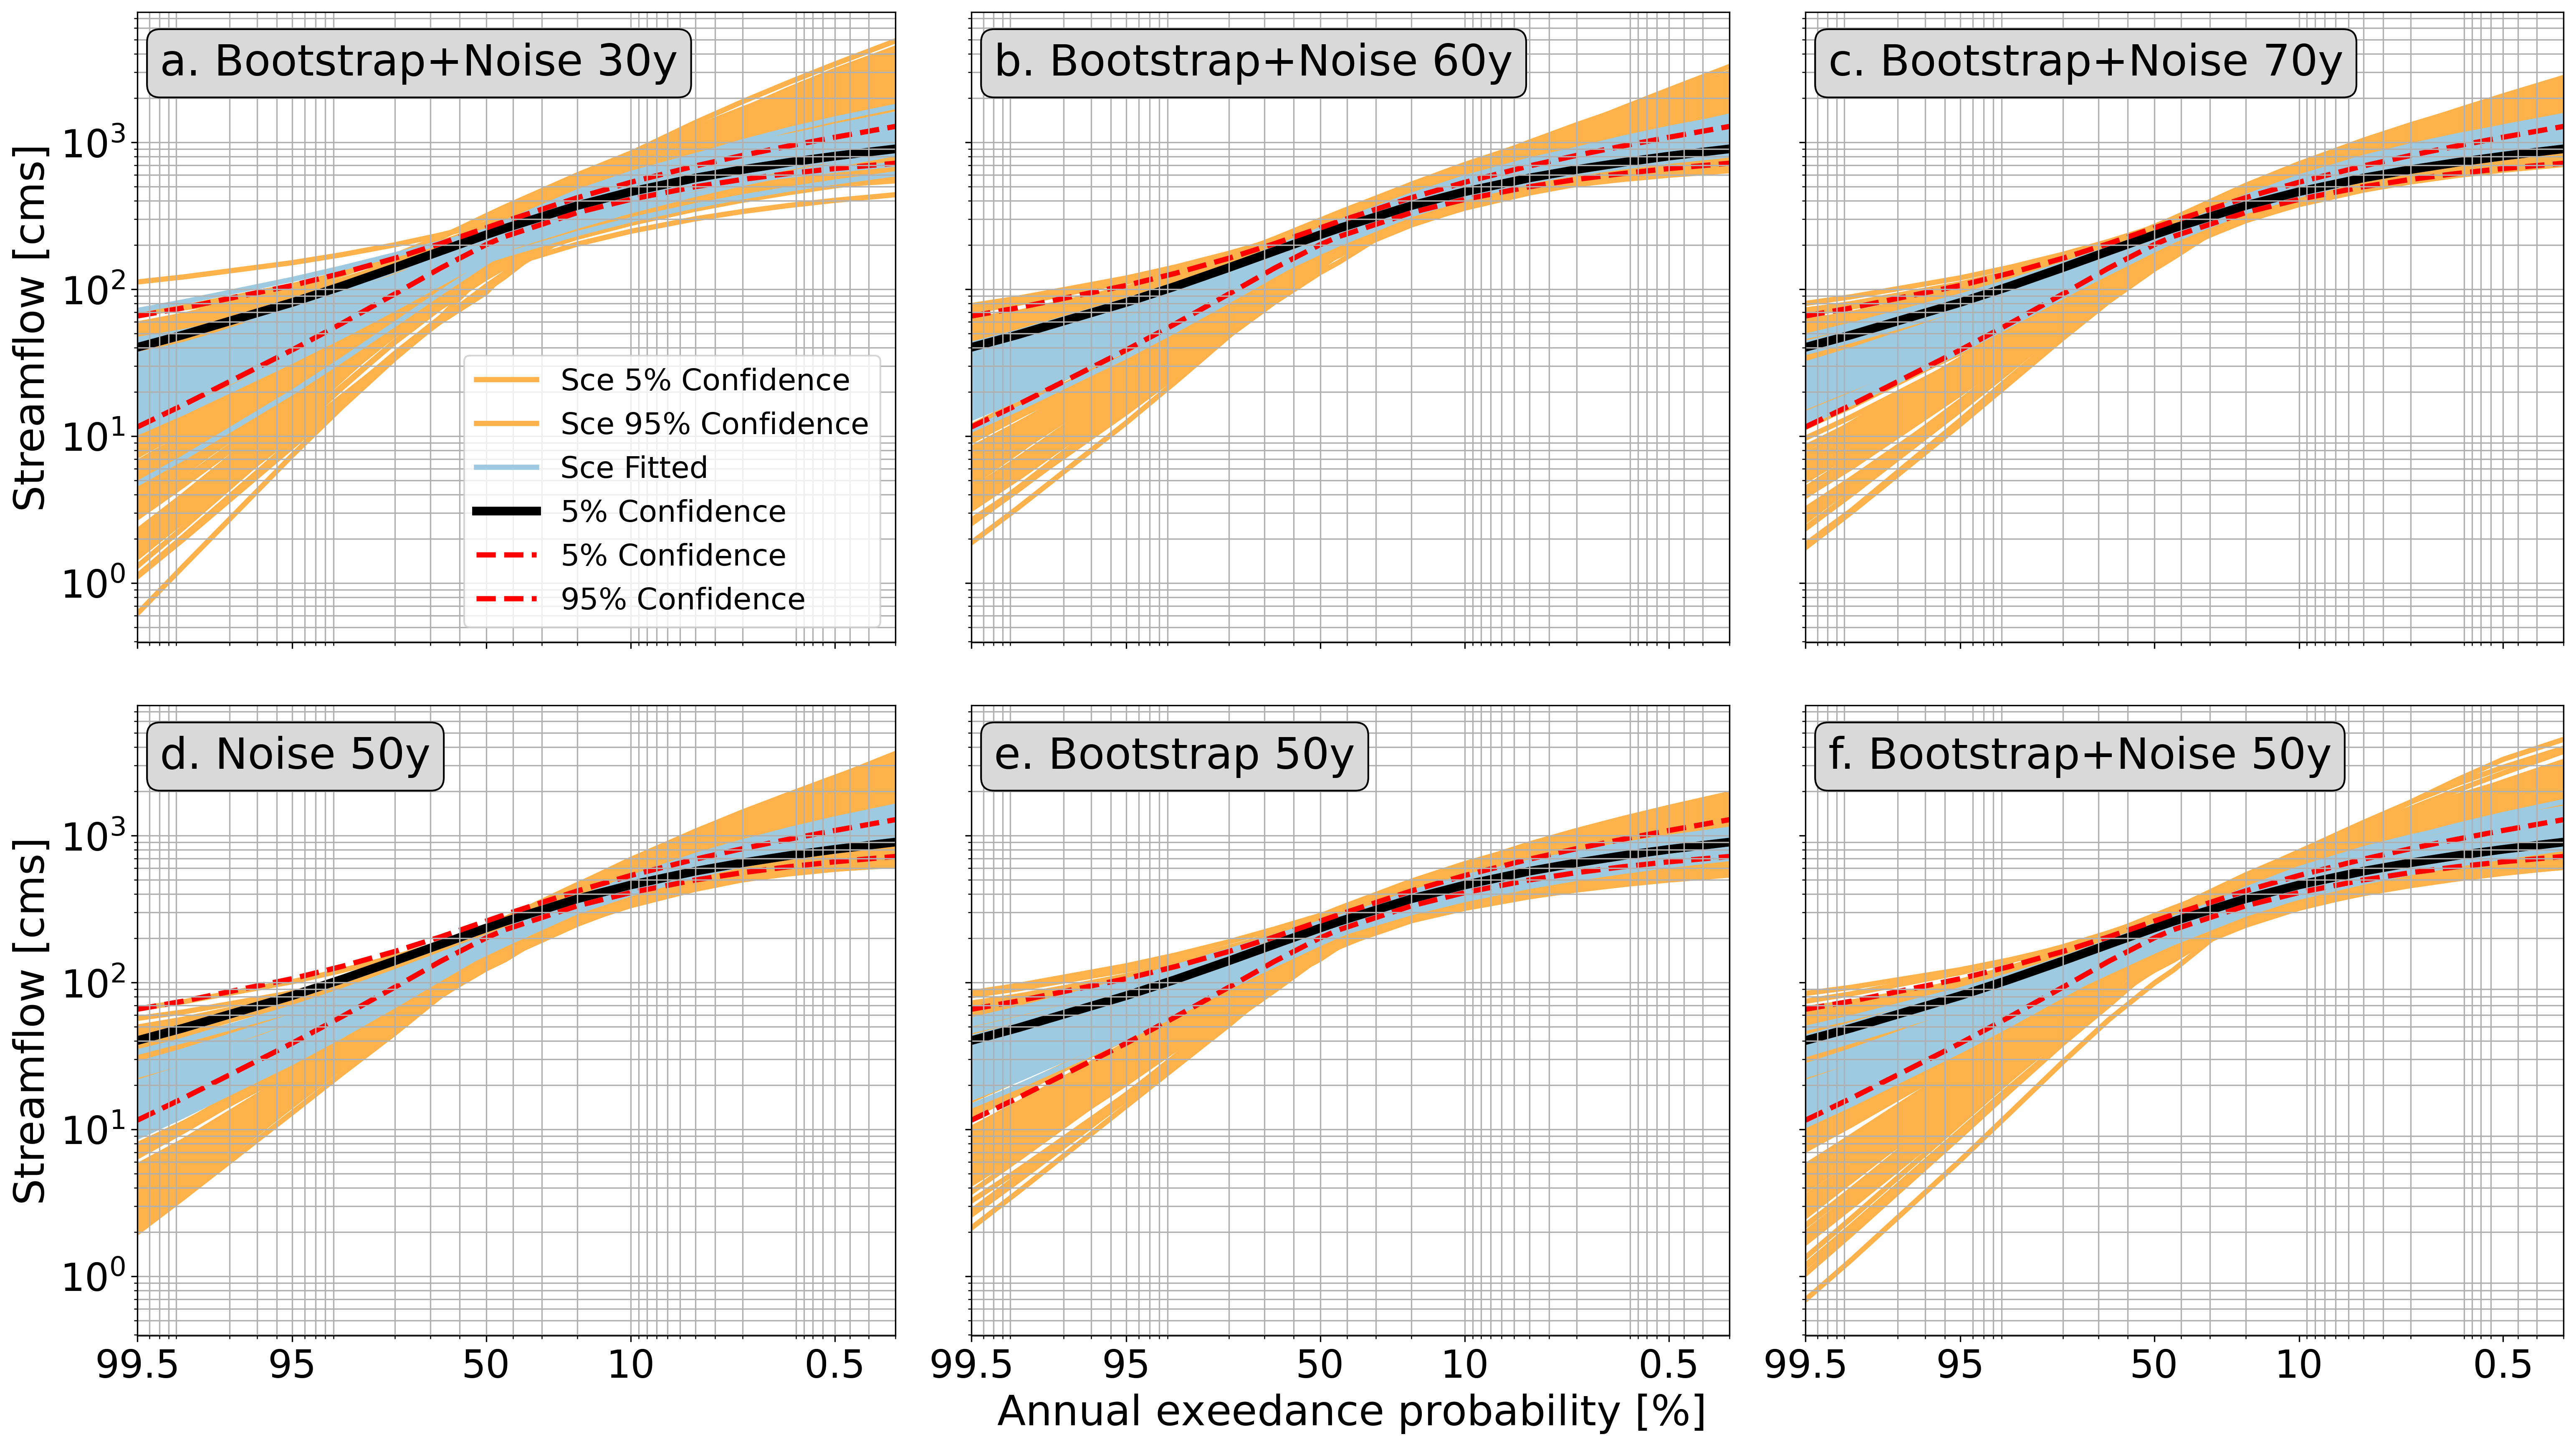

In [58]:
fig, ax = pl.subplots(2,3,figsize = (25,14), sharey=True, sharex=True, dpi = 300)

dn = read_prt('NORTHRACOON_30Y_NOISE.PRT')
a = plot_freq(do, ax[0][0], dn)
#a.legend().set_visible(False)
a.set_xlabel('')
a.set_xticks([0.005,0.05,0.5,0.9,0.995])
a.set_xticklabels([99.5,95,50,10,0.5])
a.text(0.03,0.9,'a. Bootstrap+Noise 30y', transform = a.transAxes, bbox = dict(boxstyle='round', fc = '#d9d9d9'), size = 25)

dn = read_prt('NORTHRACOON_60Y_NOISE.PRT')
a = plot_freq(do, ax[0][1], dn)
a.legend().set_visible(False)
a.set_ylabel('')
a.set_xlabel('')
a.set_xticks([0.005,0.05,0.5,0.9,0.995])
a.set_xticklabels([99.5,95,50,10,0.5])
a.text(0.03,0.9,'b. Bootstrap+Noise 60y', transform = a.transAxes, bbox = dict(boxstyle='round', fc = '#d9d9d9'), size = 25)

dn = read_prt('NORTHRACOON_70Y_NOISE.PRT')
a = plot_freq(do, ax[0][2], dn)
a.legend().set_visible(False)
a.set_ylabel('')
a.set_xlabel('')
a.set_xticks([0.005,0.05,0.5,0.9,0.995])
a.set_xticklabels([99.5,95,50,10,0.5])
a.text(0.03,0.9,'c. Bootstrap+Noise 70y', transform = a.transAxes, bbox = dict(boxstyle='round', fc = '#d9d9d9'), size = 25)

##############################################################################

dn = read_prt('NORTHRACOON_50Y_NOISENOSHUFFLE.PRT')
a = plot_freq(do, ax[1][0], dn)
a.legend().set_visible(False)
a.set_xlabel('')
a.set_xticks([0.005,0.05,0.5,0.9,0.995])
a.set_xticklabels([99.5,95,50,10,0.5])
a.text(0.03,0.9,'d. Noise 50y', transform = a.transAxes, bbox = dict(boxstyle='round', fc = '#d9d9d9'), size = 25)

dn = read_prt('NORTHRACOON_50Y_NONOISE.PRT')
a = plot_freq(do, ax[1][1], dn)
a.legend().set_visible(False)
a.set_ylabel('')
a.set_xticks([0.005,0.05,0.5,0.9,0.995])
a.set_xticklabels([99.5,95,50,10,0.5])
a.text(0.03,0.9,'e. Bootstrap 50y', transform = a.transAxes, bbox = dict(boxstyle='round', fc = '#d9d9d9'), size = 25)

dn = read_prt('NORTHRACOON_50Y_NOISE.PRT')
a = plot_freq(do, ax[1][2], dn)
a.legend().set_visible(False)
a.set_ylabel('')
a.set_xlabel('')
a.set_xticks([0.005,0.05,0.5,0.9,0.995])
a.set_xticklabels([99.5,95,50,10,0.5])
a.text(0.03,0.9,'f. Bootstrap+Noise 50y', transform = a.transAxes, bbox = dict(boxstyle='round', fc = '#d9d9d9'), size = 25)
a.grid(which = 'major')
pl.subplots_adjust(wspace = 0.1, hspace = 0.1)
pl.savefig('figures/Fig3_FFE_Examples.png', bbox_inches = 'tight')

## Shifting number of years 

In [12]:
sigma = 0.1
for nyears in [90,80,60,50,40,30]:
    l = write_mutated_peaks('05412500f-turkey.txt',
                        'turkey_%dy_noNoise.txt' % nyears,
                        'turkey_%dy_noNoise.psf' % nyears,
                        'turkey_mut_%dy_noNoise.prt'  % nyears, nyears, 50,
                       -0.4,0.55,sigma, method = 'EMS', add_noise=False)

## Decreasing number of years + noise 

In [14]:
sigma = 0.1
for nyears in [90,80,60,50,40,30]:
    l = write_mutated_peaks('05412500f-turkey.txt',
                        'turkey_%dy_Noise.txt' % nyears,
                        'turkey_%dy_Noise.psf' % nyears,
                        'turkey_mut_%dy_Noise.prt'  % nyears, nyears, 50,
                       -0.4,0.55,sigma, method = 'EMS', add_noise=True)

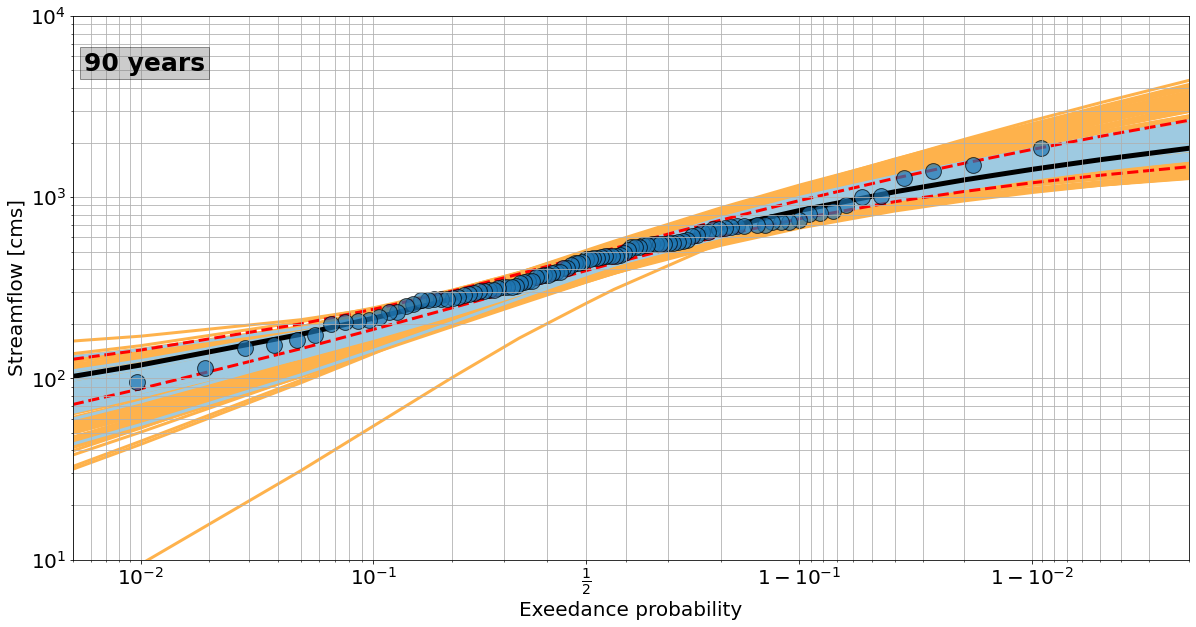

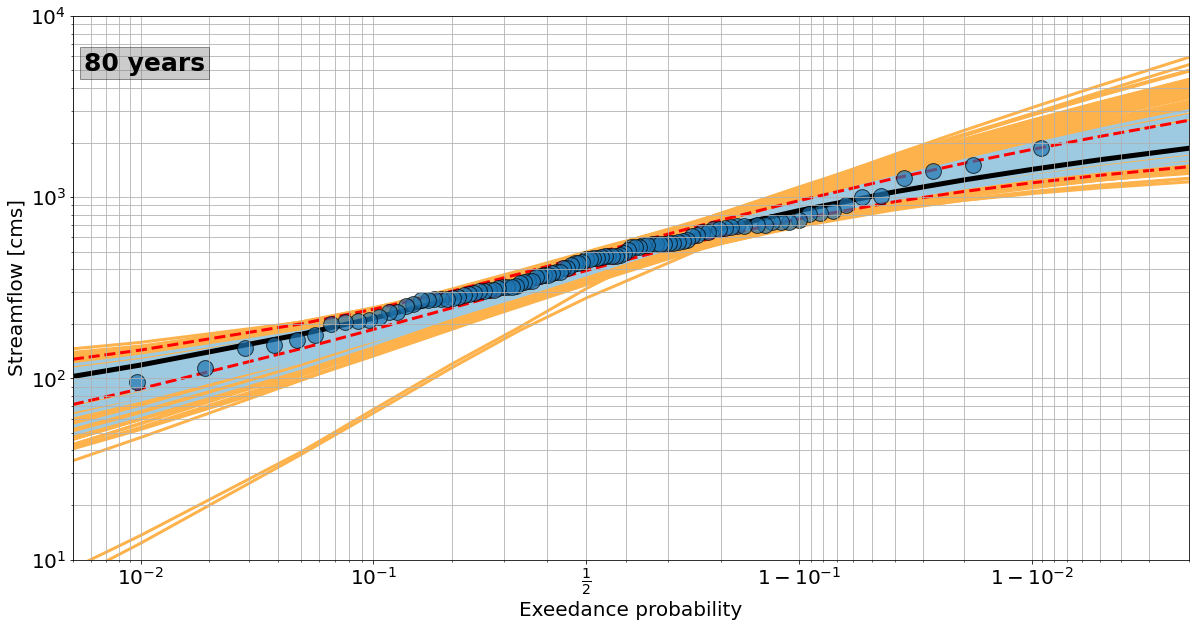

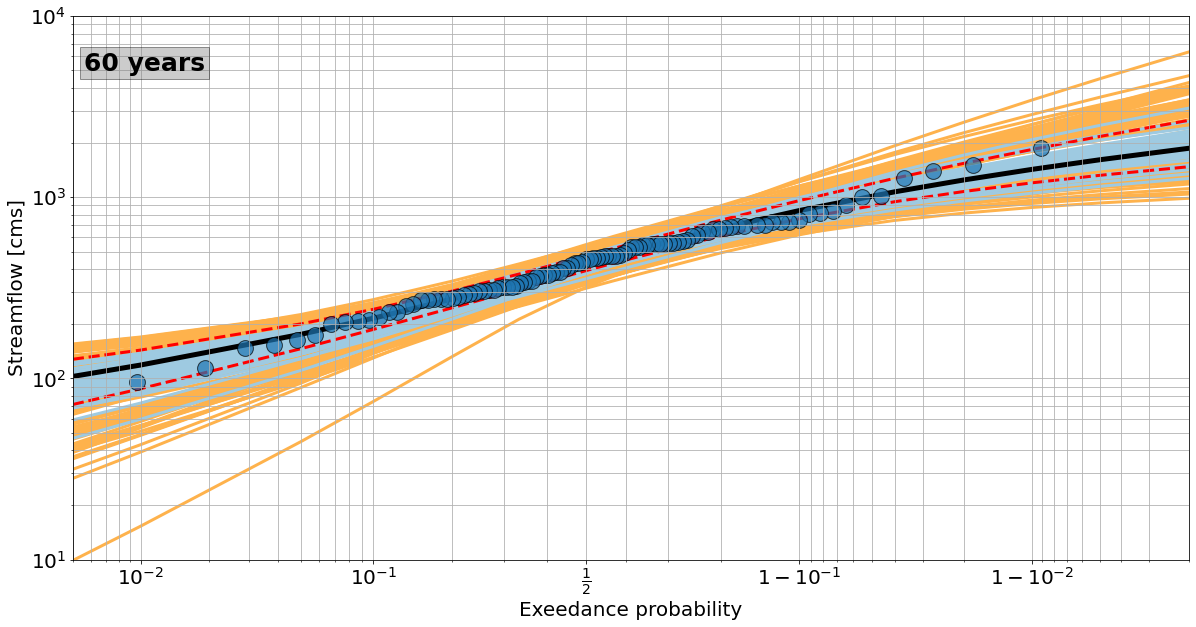

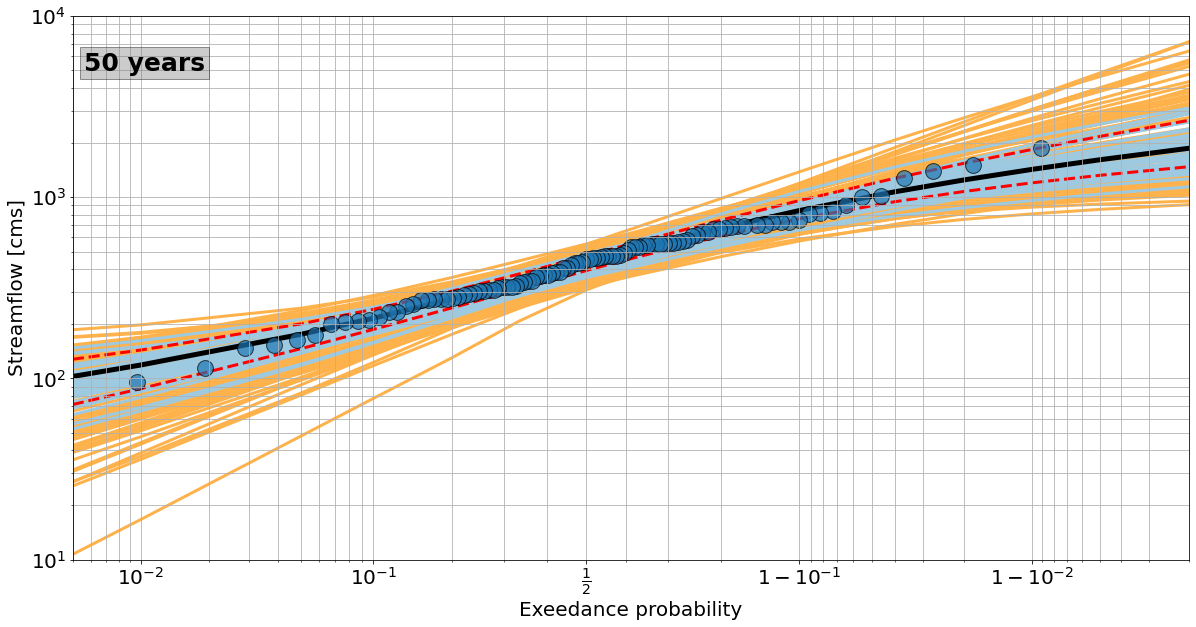

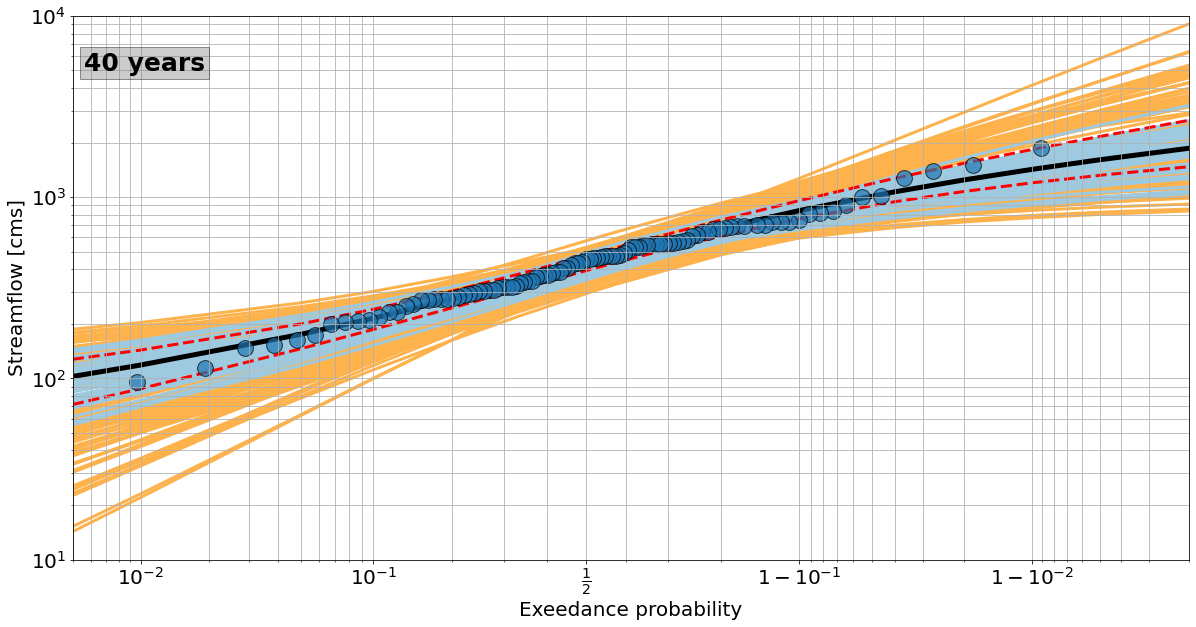

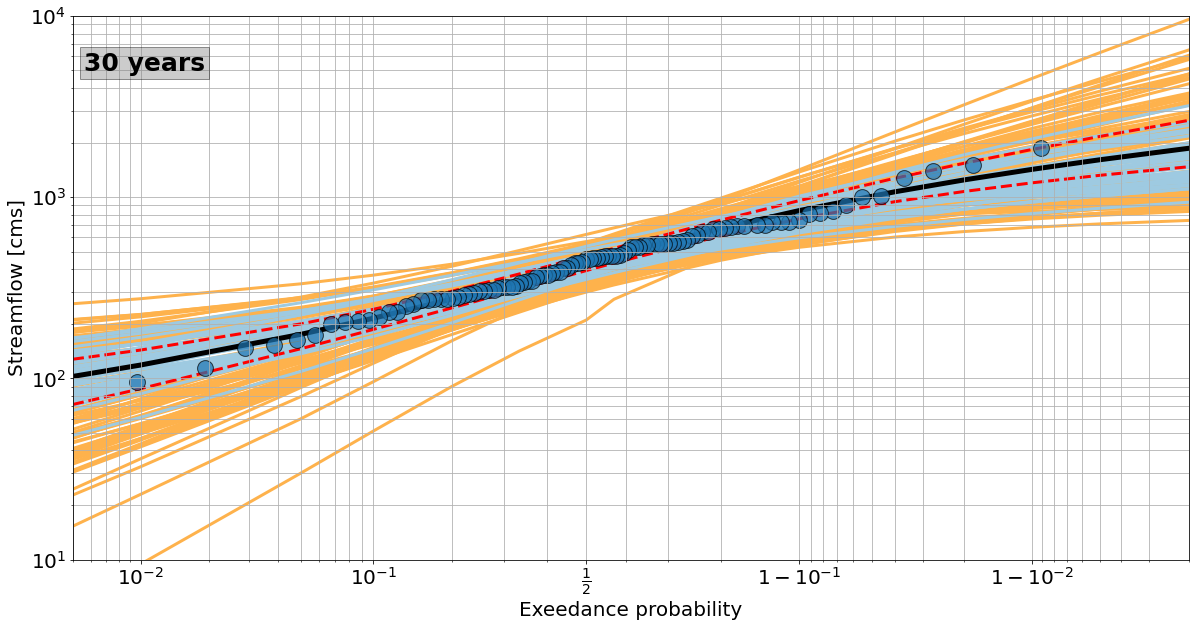

In [15]:
for nyears in [90,80,60,50,40,30]:
    dn = read_prt('TURKEY_MUT_%sy_NOISE.PRT' % nyears)
    ax = plot_freq(do, dn)
    text = '%d years' % nyears
    ax.text(0.01,0.9, text, fontdict = {'size': 25, 'weight':'bold'}, transform = ax.transAxes,
        bbox=dict(facecolor='gray', alpha=0.4)) 
    ax.set_ylim(10e0, 10e3)    
    ax.scatter(1-ema, q*0.028, s = 250, edgecolor = 'k', zorder = 1, alpha = 0.7)

## Just noise 

In [5]:
sigma = 0.1
for nyears in [90,80,60,50,40,30]:
    l = write_mutated_peaks('05412500f-turkey.txt',
                        'turkey_%dy_NoiseNoShuffle.txt' % nyears,
                        'turkey_%dy_NoiseNoShuffle.psf' % nyears,
                        'turkey_mut_%dy_NoiseNoShuffle.prt'  % nyears, nyears, 50,
                       -0.4,0.55,sigma, method = 'EMS', add_noise=True, shuffle=False)

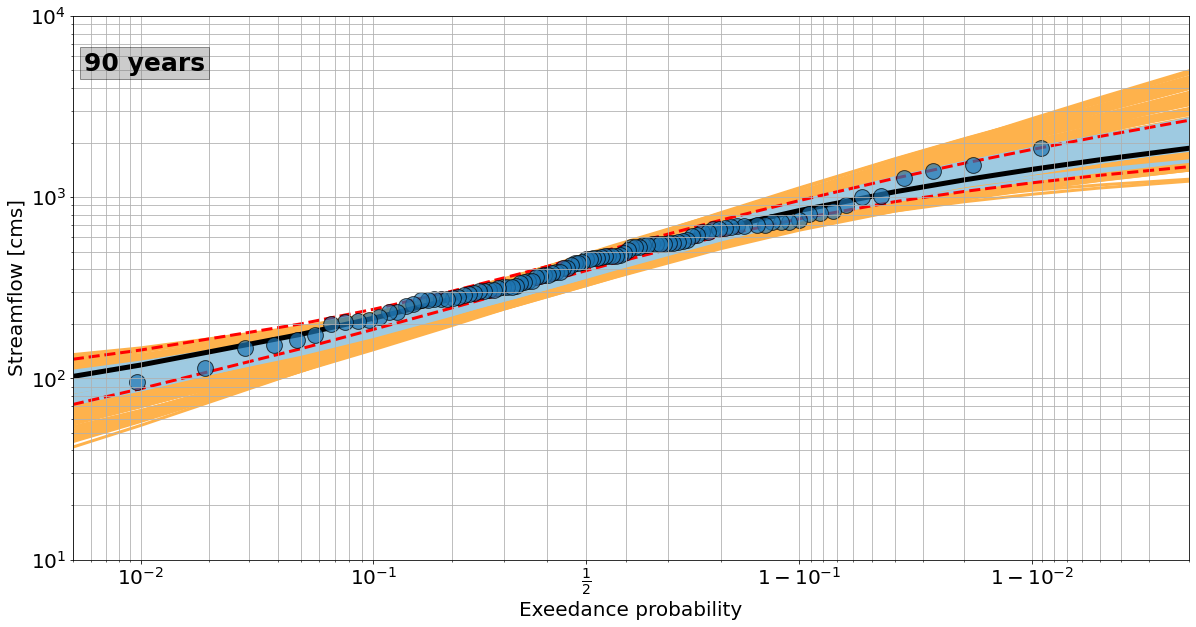

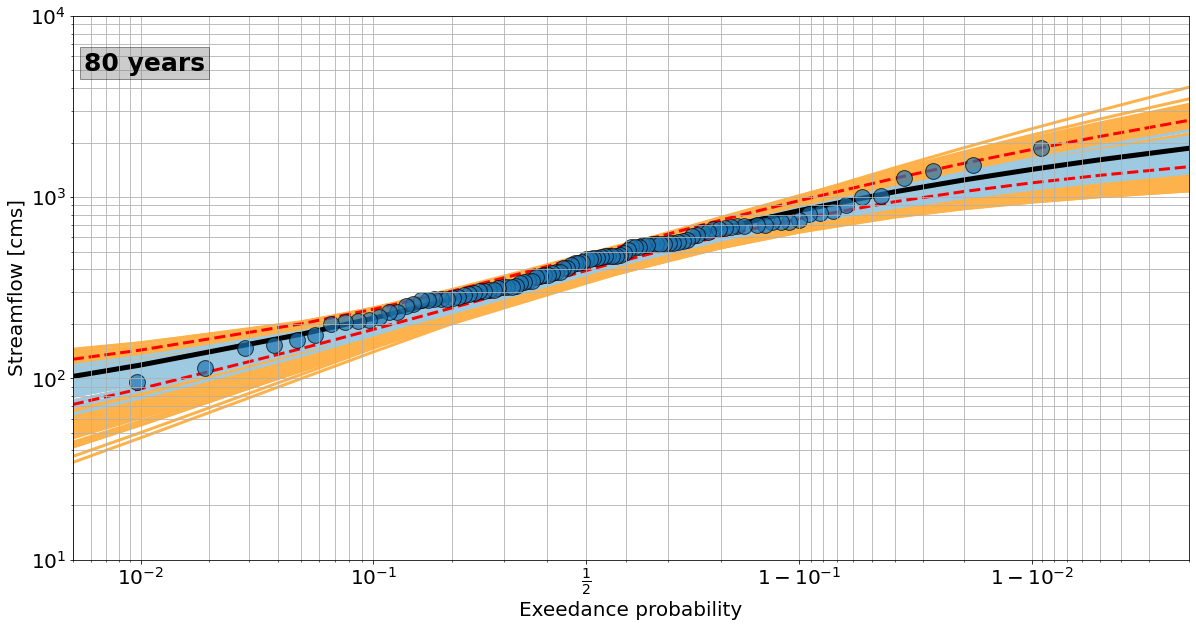

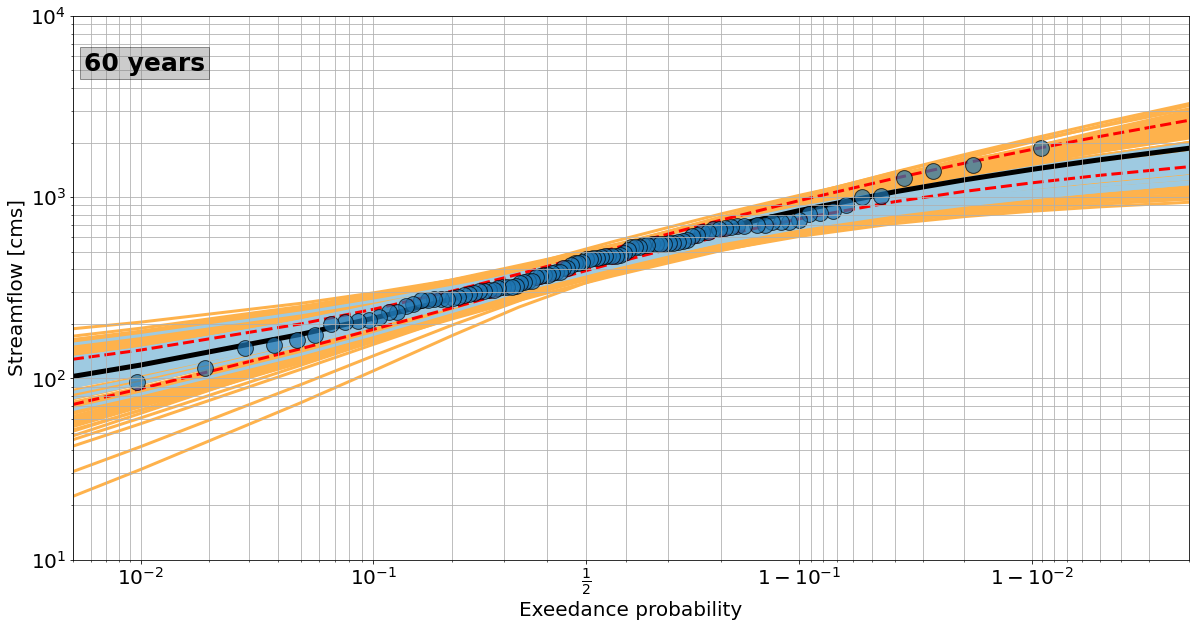

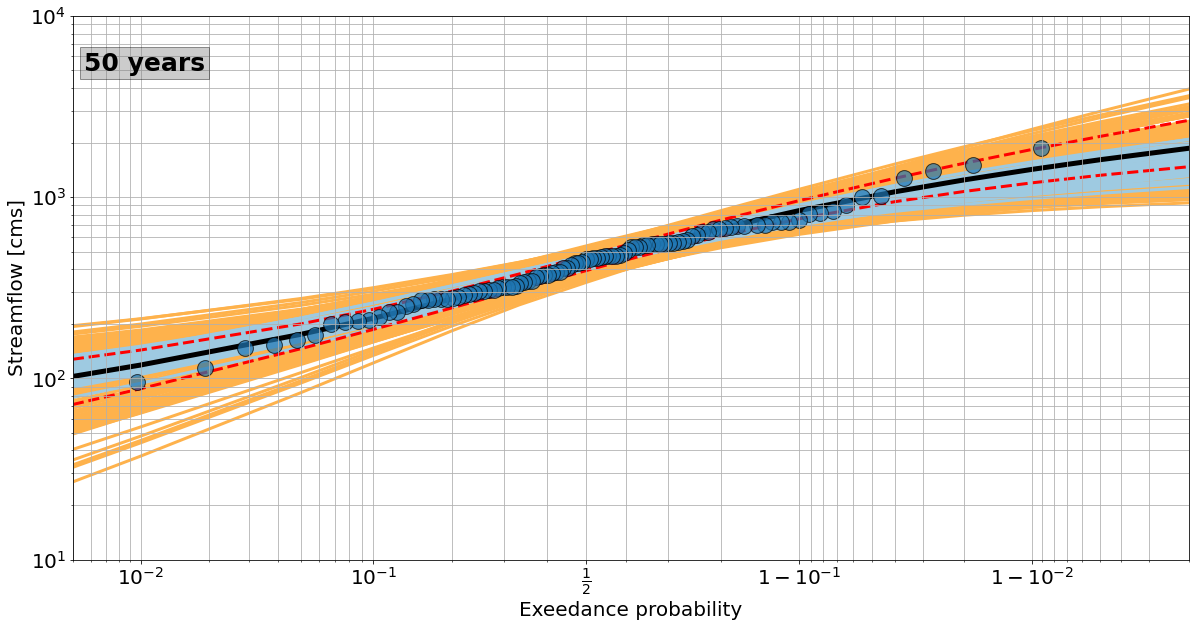

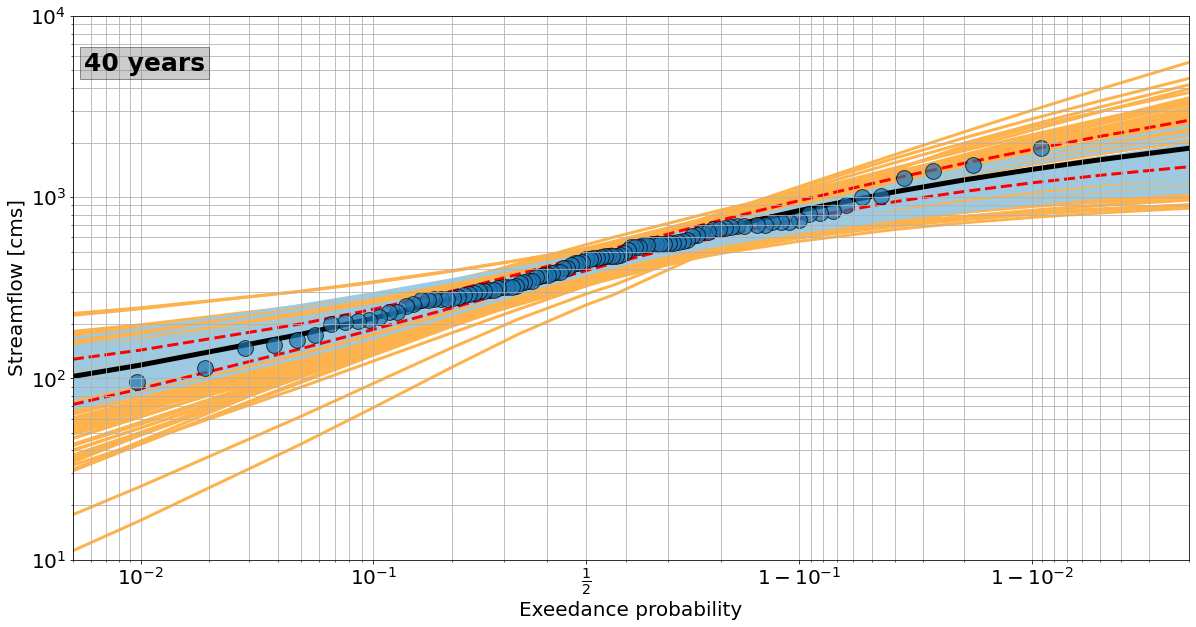

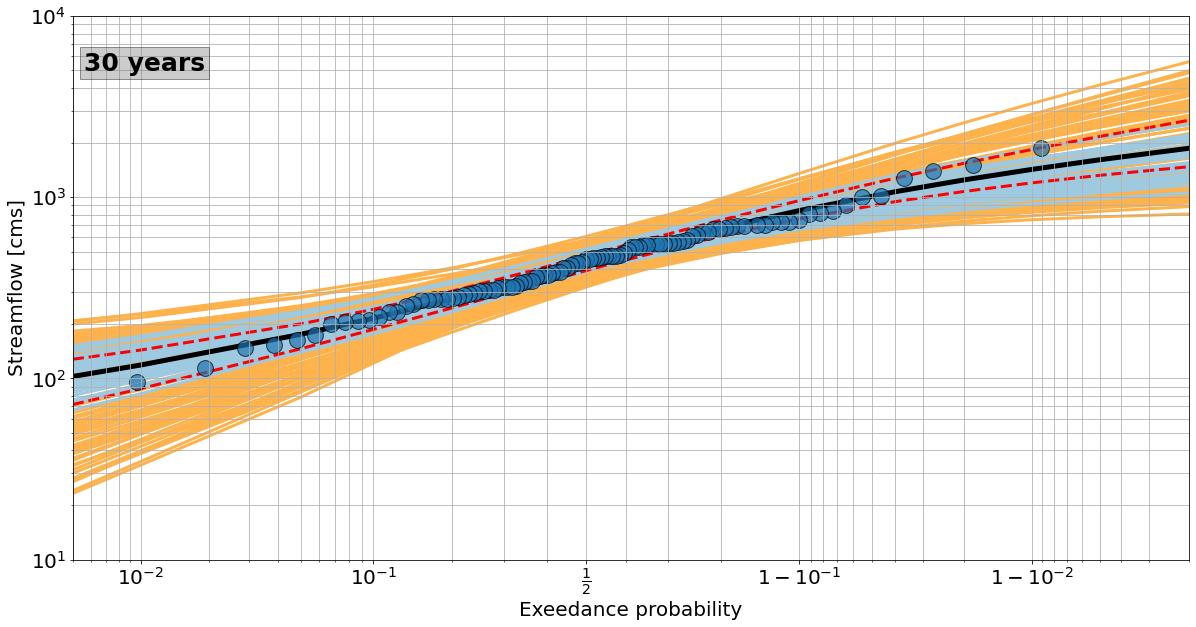

In [7]:
for nyears in [90,80,60,50,40,30]:
    dn = read_prt('TURKEY_MUT_%sy_NOISENOSHUFFLE.PRT' % nyears)
    ax = plot_freq(do, dn)
    text = '%d years' % nyears
    ax.text(0.01,0.9, text, fontdict = {'size': 25, 'weight':'bold'}, transform = ax.transAxes,
        bbox=dict(facecolor='gray', alpha=0.4)) 
    ax.set_ylim(10e0, 10e3)    
    ax.scatter(1-ema, q*0.028, s = 250, edgecolor = 'k', zorder = 1, alpha = 0.7)

## Comparing cases 

In [477]:
do = read_prt('05412500F-TURKEY.PRT')[0]
q,ema,p = read_obs('05412500F-TURKEY.PRT')
all_ratios_wi = ratios4cases_of_gauge('TURKEY_MUT_*', do)
all_ratios_wo = ratios4cases_of_gauge('TURKEY_MUT_*', do, 'no_reg_skew')

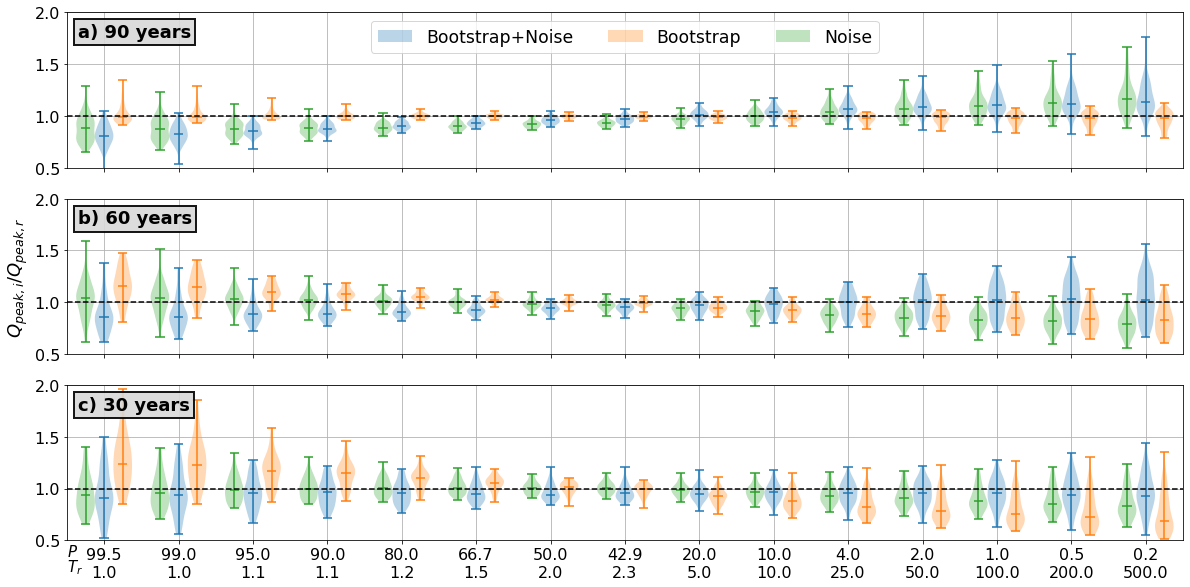

In [952]:
plot_ratios_vs_tr(all_ratios, do, years=[90,60,30], path='figures/turkey_periodVsQpeak_rate.png')

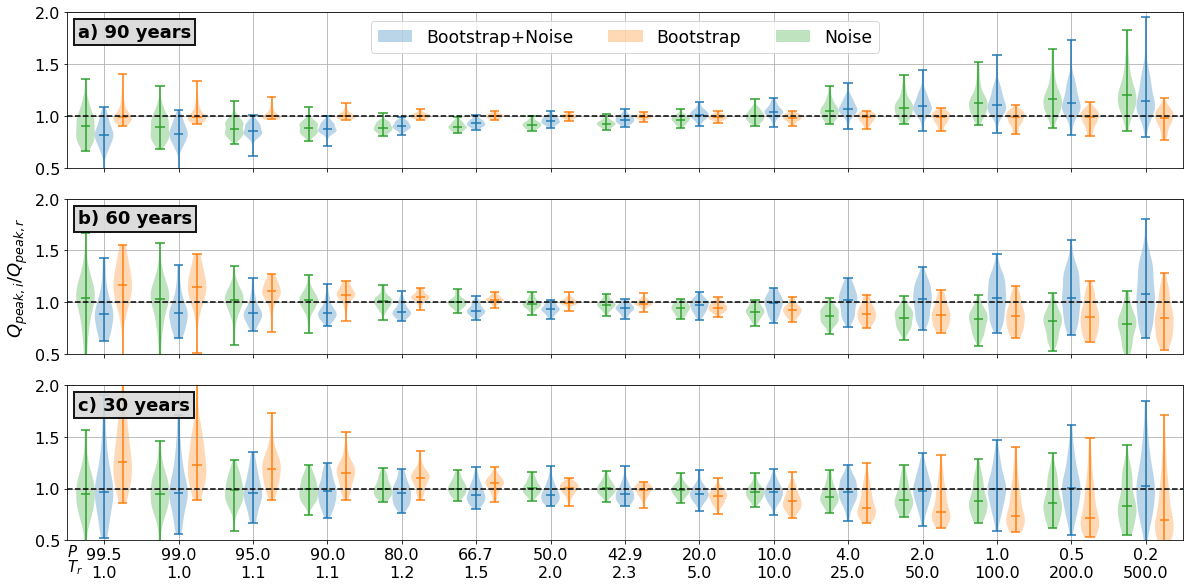

In [953]:
plot_ratios_vs_tr(all_ratios, do, years=[90,60,30],which='wo')

# Noise 

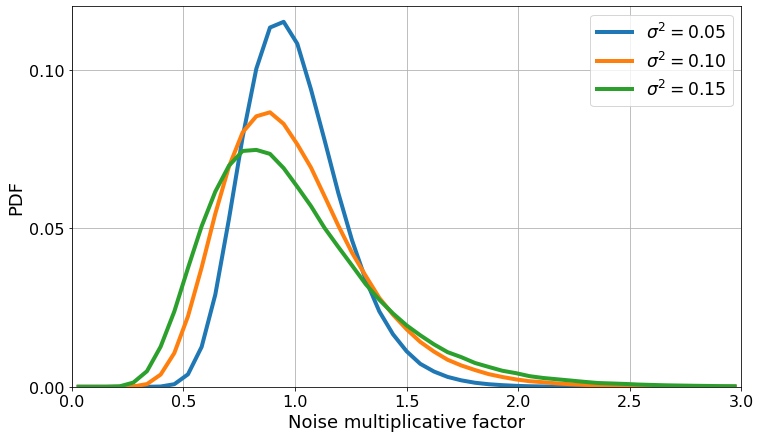

In [26]:
sigma2 = 0.03
fig = pl.figure(figsize=(12,7))
ax = fig.add_subplot(111)
bins = np.linspace(0,3,50)
for sigma2 in [0.05,0.1,0.15]:
    Et = -0.5*np.log(1+sigma2) #Sigma can also be 0.3
    Vt = np.log(1+sigma2)
    a = np.exp(np.random.normal(Et, np.sqrt(Vt), 1000000))
    h, b = np.histogram(a, bins = bins)
    h = h.astype(float) / h.sum()
    b = (b[:-1]+b[1:])/2
    text = '$\\sigma^2=%.2f$' % sigma2 
    ax.plot(b, h, lw = 4, label = text)
ax.legend(loc = 0, fontsize = 'xx-large')
ax.tick_params(labelsize = 16)
ax.grid()
ax.set_xlabel('Noise multiplicative factor', size = 18)
ax.set_ylabel('PDF', size = 18)
ax.set_ylim(0,0.12)
ax.set_xlim(0,3)
ax.set_yticks([0,0.05,0.1])
pl.savefig('figures/noise_error_distribution.png', bbox_inches = 'tight')

# Cedar Rapids

In [374]:
create_cases('05464500f-cedar.txt', skew=-0.4,)

cedar


In [4]:
def plot_freq(do,dn = None, q = None, ema = None, path = None):
    fig = pl.figure(figsize=(20,10))
    ax = fig.add_subplot(111)    
    if dn is not None:
        pre = ''
        for d in dn:    
            ax.plot(1-d['prob'], d['conf5']*0.028, lw = 3, c = '#feb24c',zorder=1, label = pre+'Sce $5\%$ Confidence')
            ax.plot(1-d['prob'], d['conf95']*0.028, lw = 3, c = '#feb24c',zorder=1, label = pre+'Sce $95\%$ Confidence')
            pre='_'
        pre = ''
        for d in dn:    
            ax.plot(1-d['prob'], d['w_reg_skew']*0.028, lw = 3,c = '#9ecae1',zorder=1,label = pre+'Sce Fitted')
            pre = '_'
    ax.plot(1-do['prob'], do['w_reg_skew']*0.028, lw = 5, c = 'k',zorder=1, label = '$5\%$ Confidence')
    ax.plot(1-do['prob'], do['conf5']*0.028, ls = '--',lw = 3, c = 'r',zorder=1, label = '$5\%$ Confidence')
    ax.plot(1-do['prob'], do['conf95']*0.028,ls = '--', lw = 3, c = 'r',zorder=1, label = '$95\%$ Confidence')
    if q is not None:
        ax.scatter(1-ema, q*0.028, s = 250, edgecolor = 'k', zorder = 1, alpha = 0.7, label = 'Observed')
    ax.set_yscale('log')
    ax.set_xscale('logit')
    x = 1-do['prob'].values
    tr = 1/do['prob'].values
    trt = np.array(['%.2f' % i for i in 100*do['prob'].values])
    ax.set_xlim(x[0],x[-1])
    p = [0,2,6,8,9,11,-2,-1]
    ax.set_xticks(x[p])
    ax.legend(loc = 0, fontsize = 'xx-large')
    ax.set_xticklabels(trt[p])
    ax.tick_params(labelsize = 22)
    ax.set_xlabel('Annual exeedance probability [$\%$]',size = 24)
    ax.set_ylabel('Streamflow [cms]',size = 24)
    ax.grid(which='both')
    if path is not None:
        pl.savefig(path, bbox_inches = 'tight')
    return ax

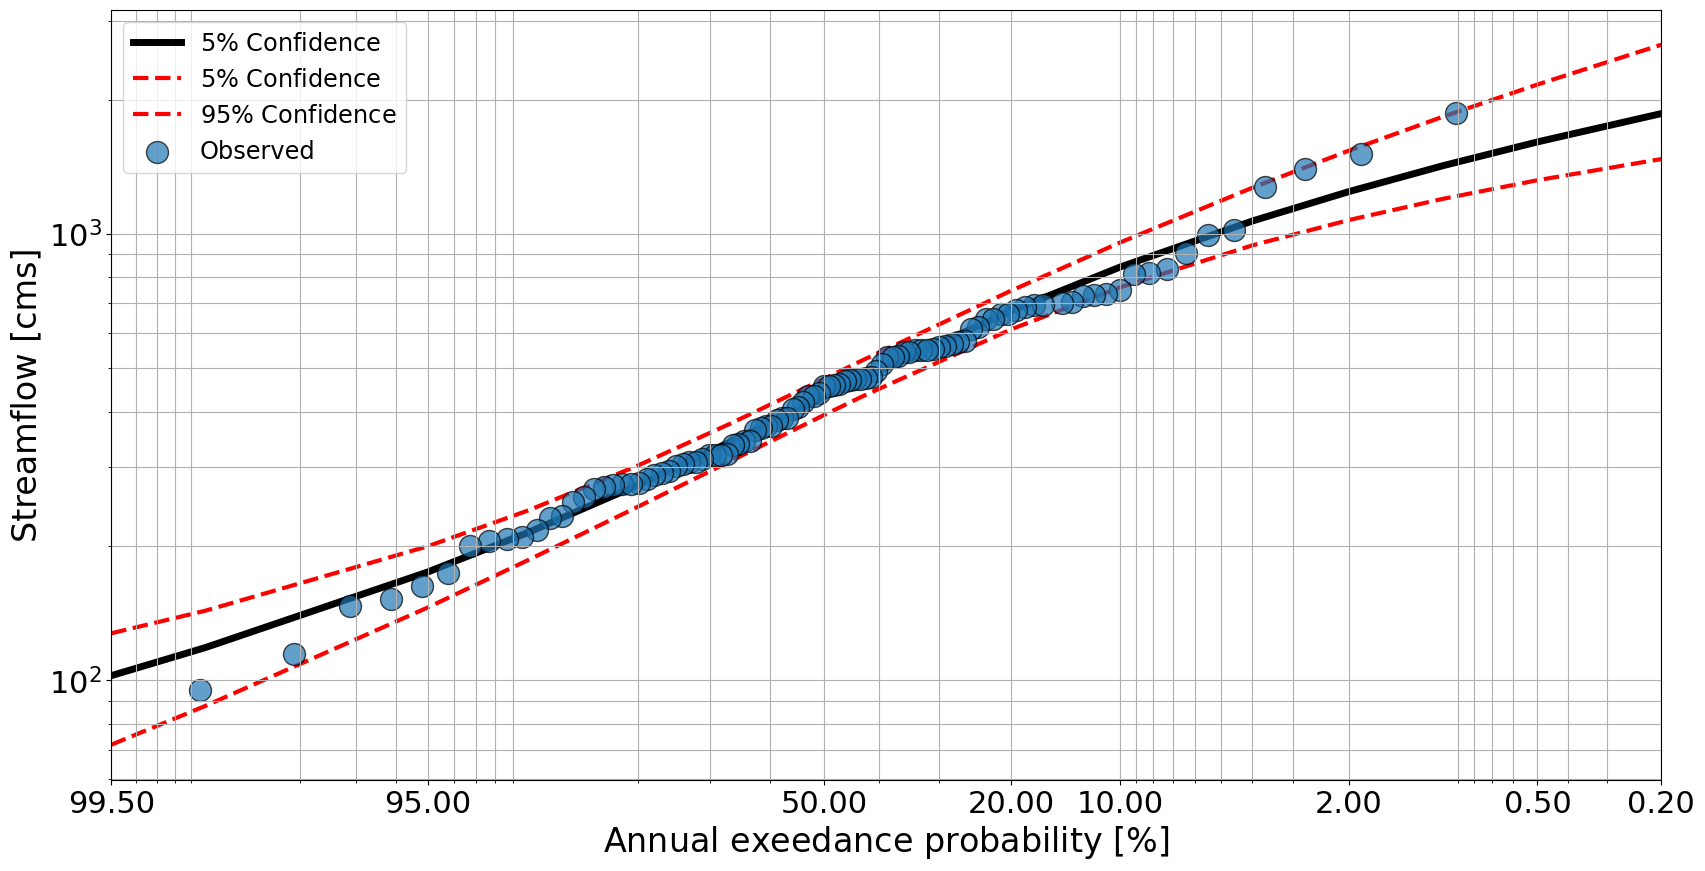

In [7]:
dn = read_prt('TURKEY_50Y_NOISE.PRT')
do = read_prt('05412500F-TURKEY.PRT')[0]
q,ema,p = read_obs('05412500F-TURKEY.PRT')

#ax = plot_freq(do, dn,q, ema, path='figures/turkey_tr_50y_noise.png')
ax = plot_freq(do,q=q,ema = ema, path='figures/example_flood_freq.png')

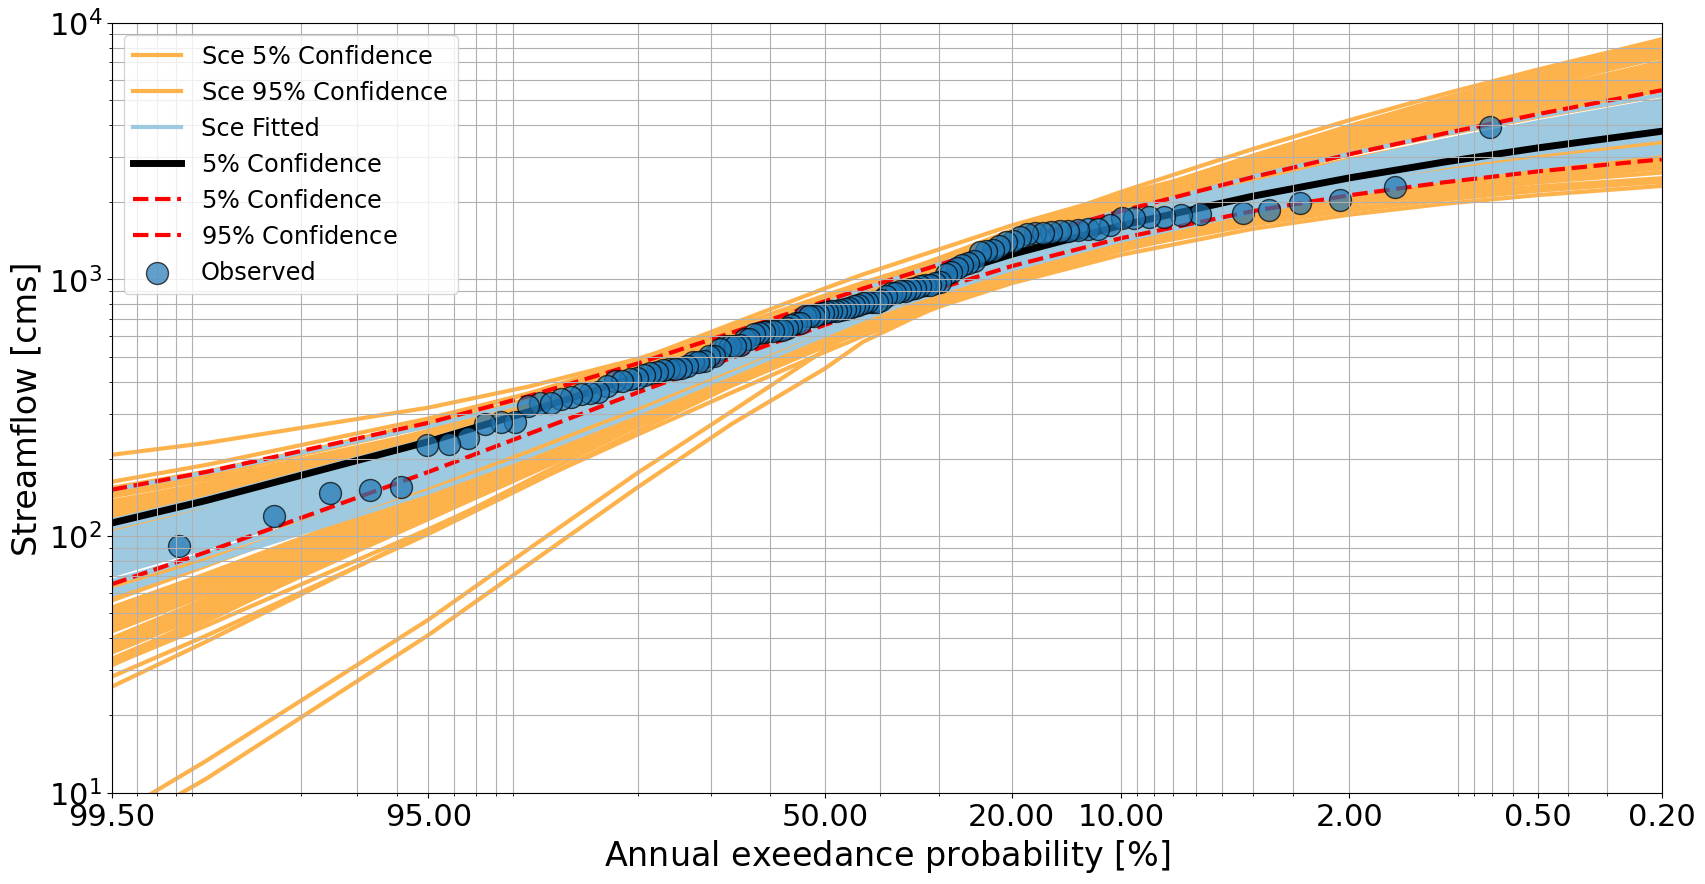

In [8]:
dn = read_prt('CEDAR_90Y_NOISE.PRT')
do = read_prt('05464500F-CEDAR.PRT')[0]
q,ema,p = read_obs('05464500F-CEDAR.PRT')

ax = plot_freq(do, dn,q, ema)
ax.set_ylim(10e0, 10e3)    
pl.savefig('figures/cedar_tr_90y_noise.png', bbox_inches = 'tight')

In [31]:
10**-2

0.01

In [9]:
do = read_prt('05464500F-CEDAR.PRT')[0]
all_ratios,all_mse, stats = ratios4cases_of_gauge('CEDAR_*', do)
wo,wi = get_ema_stats('05464500F-CEDAR.PRT')

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f670d478160>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f670d478070>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f670d475700>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f670d475b80>}

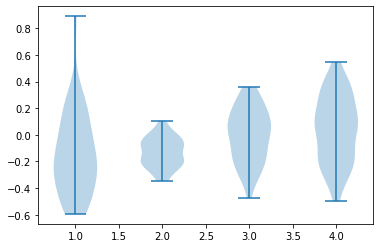

In [19]:
pl.violinplot(all_mse[30]['wi']['NOISE'][:,[1,6,12,14]])

In [68]:
def plot_ratios_vs_tr(all_ratios, do, years = [90,60,30], path = None, ylim = [0.5,2], 
                      yticks = [0.5,1,1.5,2.0],which='wi',hline=0,ylabel='$MSD(Q_{peak})$', error=0.1, start = 0):
    text = []
    for p in [99.0,50,1,0.2]:
        pro = p
        Tr=1/(p/100)
        text.append('%.1f\n%.1f' % (pro, Tr))
    print(text)
    letters = ['a','b','c','d','e','f','g','h','i','j','k','l']    
    fig = pl.figure(figsize=(5,20))
    for c,nyears in enumerate(years):
        ax = fig.add_subplot(6,1,c+1)
        ratios = all_ratios[nyears][which]
        vio1 = pl.violinplot(ratios['NOISE'][:,[1,6,12,14]], positions=np.arange(0,8,2), showmedians=True)
        vio2 = pl.violinplot(ratios['NONOISE'][:,[1,6,12,14]], positions=np.arange(0,8,2)+0.5, showmedians=True)
        vio3 = pl.violinplot(ratios['NOISENOSHUFFLE'][:,[1,6,12,14]], positions=np.arange(0,8,2)-0.5, showmedians=True)
#         if c==0:
#             pl.legend([vio1['bodies'][0],vio2['bodies'][0],vio3['bodies'][0]],['Bootstrap+Noise','Bootstrap','Noise'],
#                      ncol = 3, fontsize = 'xx-large', loc = 9)
        pl.hlines(hline, -1,8, color = 'k', ls = '--')
        ax.set_xticks(np.arange(0,8,2))
        ax.set_ylim(ylim[0], ylim[1])
        ax.tick_params(labelsize = 16)
        ax.set_yticks(yticks)
        ax.hlines(error,-1,8,color = 'k',ls = '-',lw = 0.1)
        ax.hlines(-error,-1,8,color = 'k',ls = '-',lw = 0.1)
        ax.fill_between([-1,8],[-error,-error],[error,error], color = 'b',alpha = 0.05)
        ax.grid()
        if c == 1:
            ax.set_ylabel(ylabel, size = 18)
        if c == len(years)-1:
            ax.set_xticklabels(text)
        else:
            ax.set_xticklabels([])
        ax.set_xlim(-0.8,7)
        t = '%d years' % (nyears)
        ax.text(0.02,0.84,t, fontdict = {'size': 16}, transform = ax.transAxes,
                bbox=dict(facecolor='#d9d9d9', alpha=0.9, lw = 2))
    ax.text(0, -0.1, '$P$', fontdict={'size':15}, transform = ax.transAxes,)
    ax.text(0, -0.2, '$T_r$', fontdict={'size':15}, transform = ax.transAxes)
    if path is not None:
        pl.savefig(path, bbox_inches = 'tight')
    return ax

In [78]:
do = read_prt('05452000F_SALT.PRT')[0]
all_ratios,all_mse, stats = ratios4cases_of_gauge('SALT_*', do)

['99.0\n1.0', '50.0\n2.0', '1.0\n100.0', '0.2\n500.0']


<AxesSubplot:>

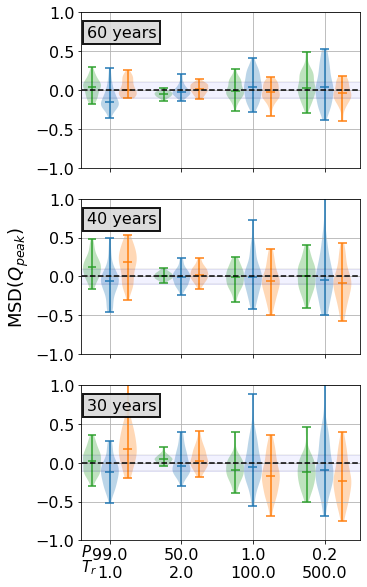

In [79]:
plot_ratios_vs_tr(all_mse, do, years=[60,40,30],ylim=[-1,1], yticks = [-1,-0.5,0,0.5,1],which='wi',ylabel='MSD($Q_{peak}$)',
                  path='figures/z_SALT_tr.png')

(<Figure size 1440x864 with 9 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>)

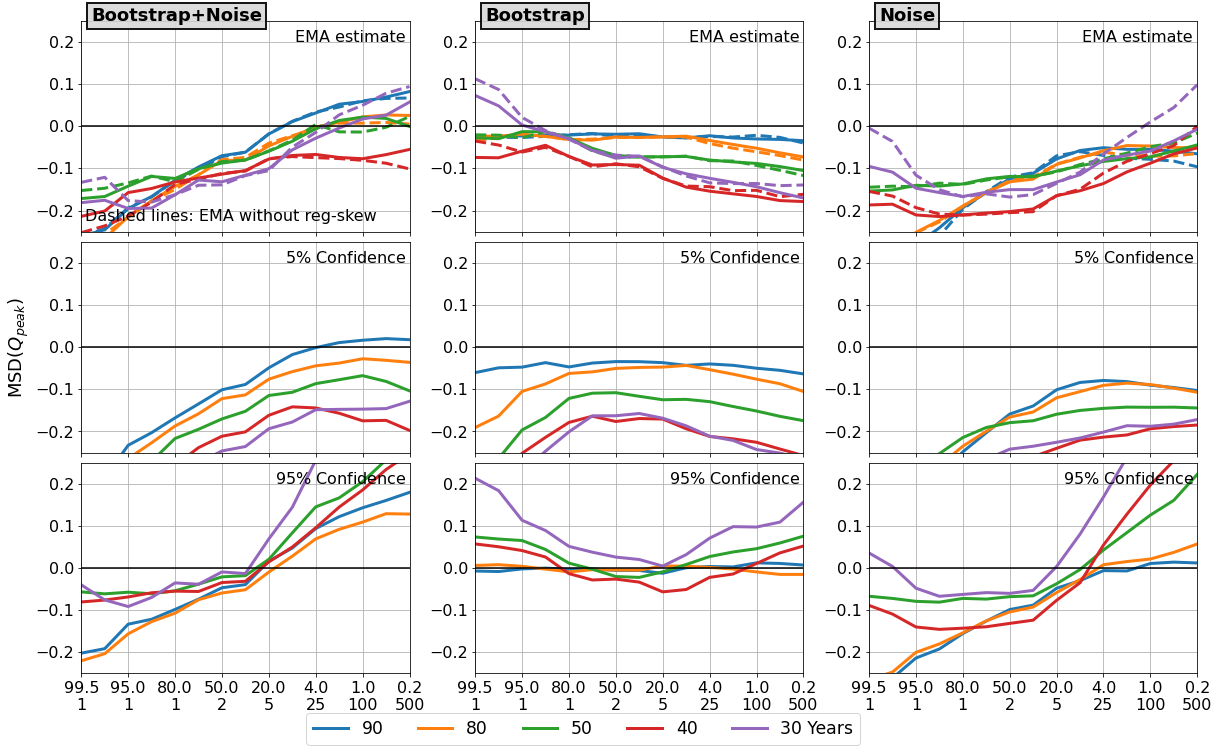

In [187]:
plot_median_ratio(all_mse, years=[90,80,50,40,30], path='figures/cedar_median_rates.png', ylim=[-0.25,0.25], 
                  yticks=[-0.2,-0.1,0,0.1,0.2], )

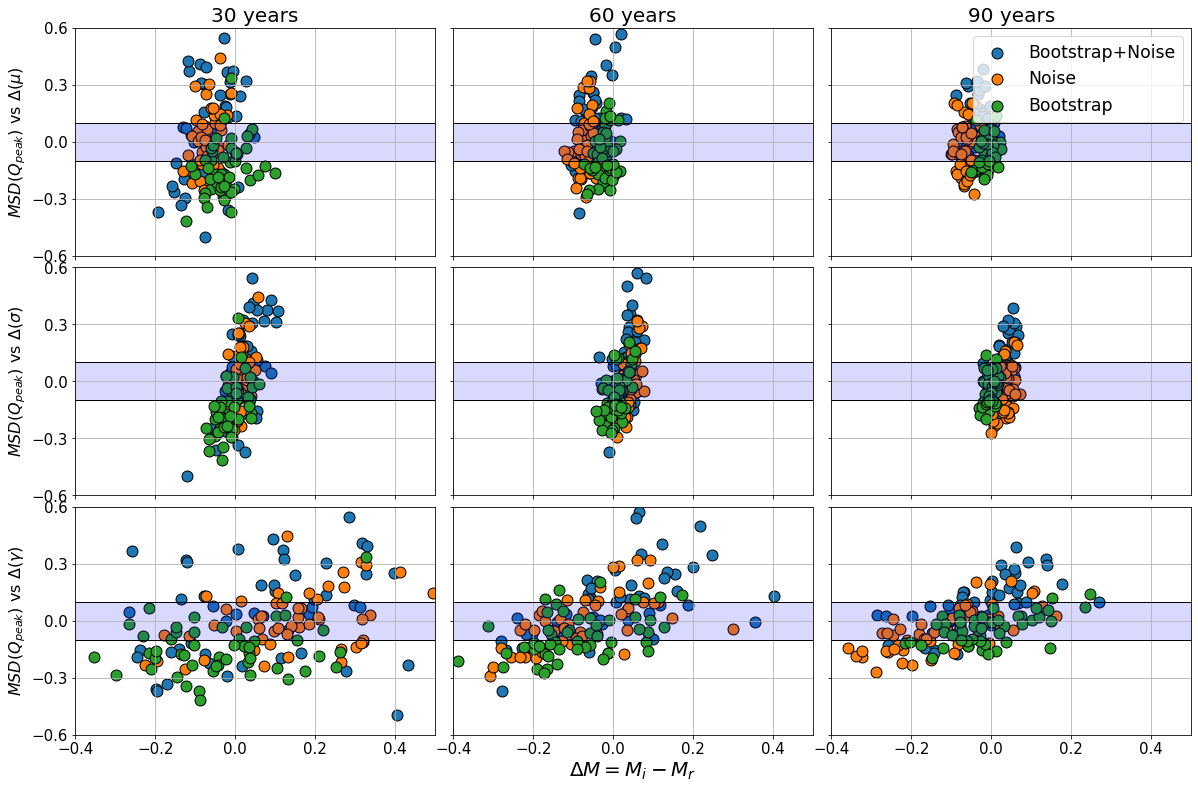

In [219]:
plot_statistics_vs_mse(stats, all_mse, wi,pos=-1, years=[30,60,90], ylim=[-0.6,0.6], xlim=[-0.4,0.5],
                       yticks=[-0.6,-0.3,0,0.3,0.6,0.9],xticks=[-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8],
                      error=0.1, which='wi', path = 'figures/AAcedar_MSE_vs_moments.png',)# figsize = (20,13))

<AxesSubplot:>

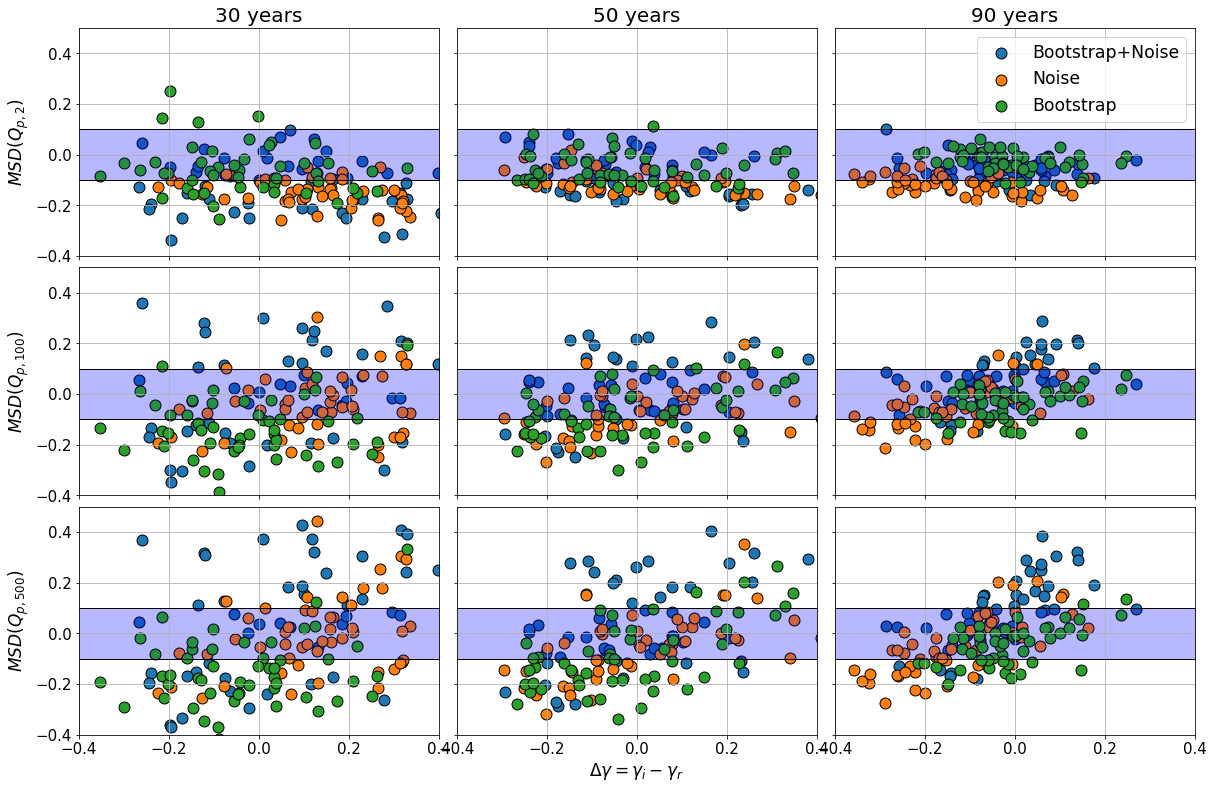

In [222]:
plot_statistics_vs_mse_compare(stats, all_mse,wi,pos=[-8,-3,-1], figsize=(20,13), yticks=[-0.4,-0.2,0,0.2,0.4],
                               xticks=[-0.4,-0.2,0,0.2,0.4], path='figures/AACedar_gamma_Qtr.png')

# Turkey

In [2]:
do = read_prt('05412500F-TURKEY.PRT')[0]
q,ema,p = read_obs('05412500F-TURKEY.PRT')
all_ratios, all_mse, stats = ratios4cases_of_gauge('TURKEY_*', do)
wo,wi = get_ema_stats('05412500F-TURKEY.PRT')

<AxesSubplot:>

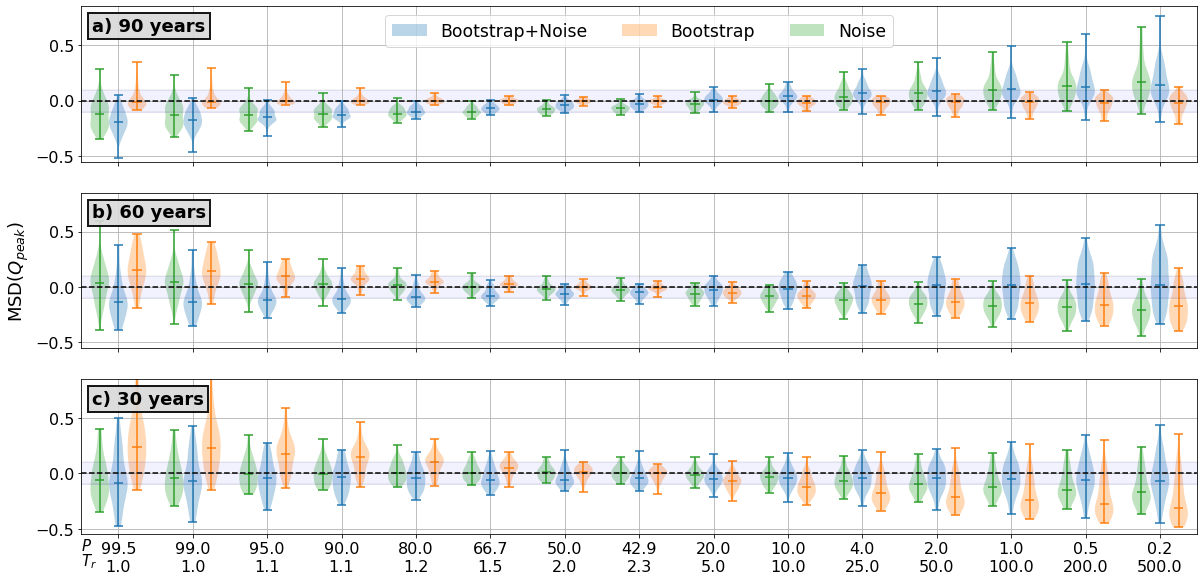

In [179]:
plot_ratios_vs_tr(all_mse, do, years=[90,60,30],ylim=[-0.55,0.85], yticks = [-0.5,0,0.5],which='wi',ylabel='MSD($Q_{peak}$)',
                  path='figures/AAAturkey_MSE_vs_Tr.png')

<AxesSubplot:>

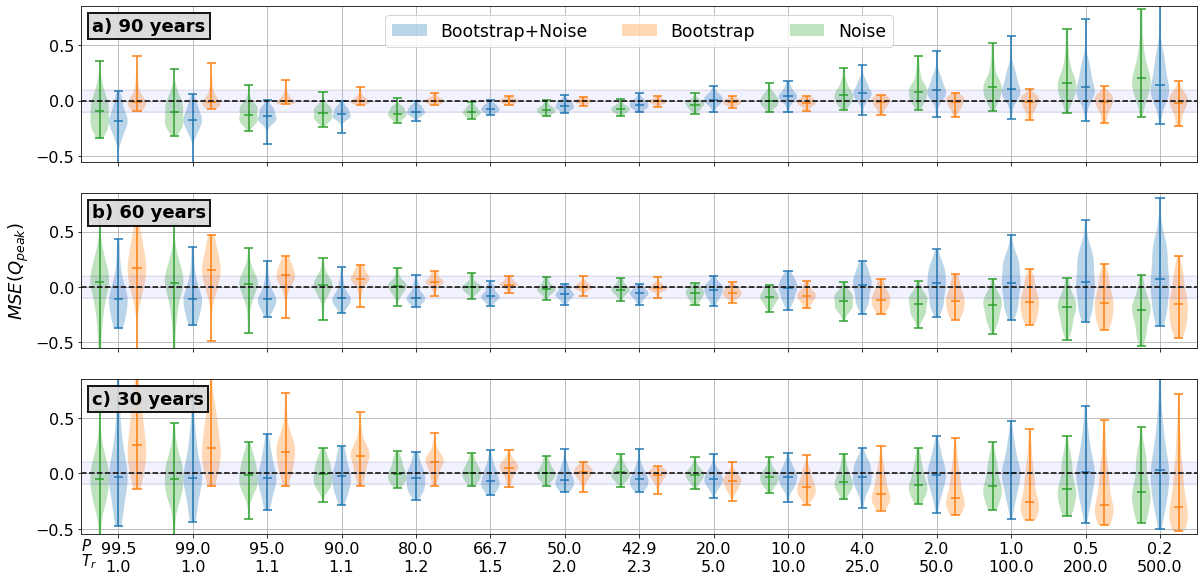

In [1164]:
plot_ratios_vs_tr(all_mse, do, years=[90,60,30],ylim=[-0.55,0.85], yticks = [-0.5,0,0.5],which='wo',
                  path='figures/turkey_MSE_vs_Tr_wo.png')

(<Figure size 1440x864 with 9 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>)

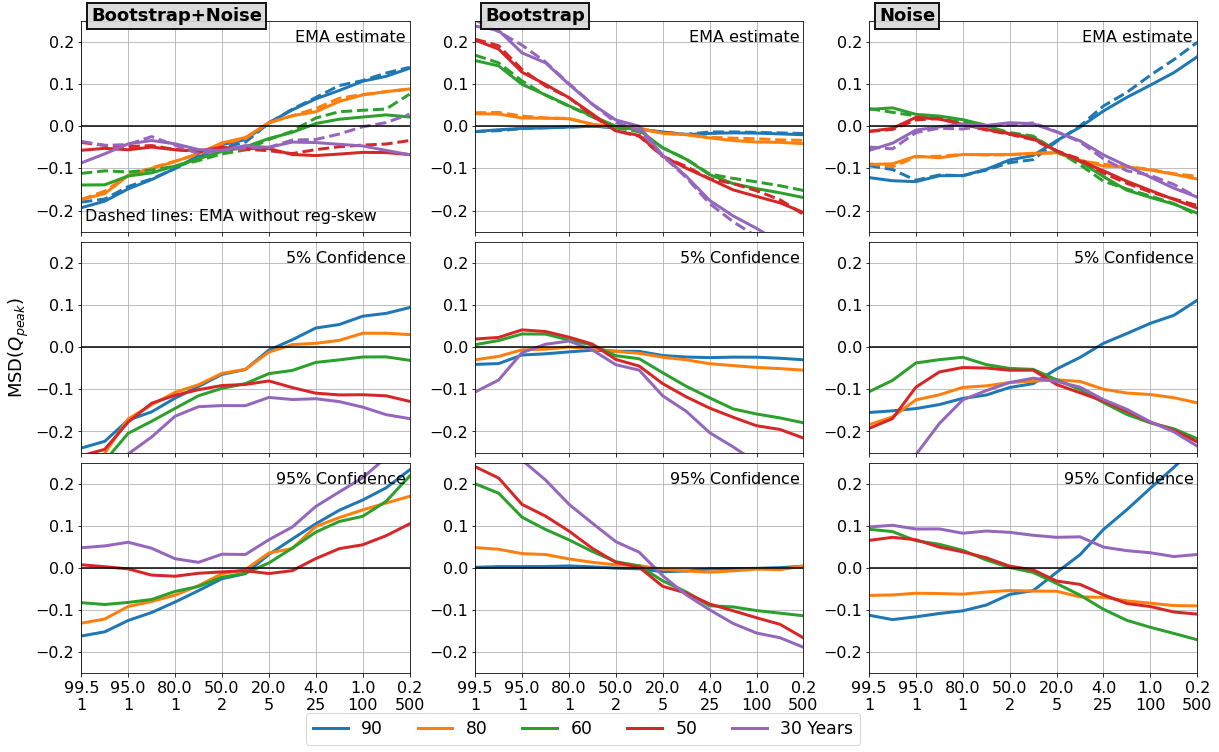

In [189]:
plot_median_ratio(all_mse, years=[90,80,60,50,30], path='figures/turkey_median_rates.png', ylim=[-0.25,0.25], 
                  yticks=[-0.2,-0.1,0,0.1,0.2])

In [53]:
def plot_statistics_vs_mse(stats, all_mse,wi, pos=-1,
    years = [30,50,90],
    ylim = [-0.5,0.6],
    xlim = [-0.4,0.6],
    xticks = [-0.3,0.0,0.3,0.6],
    yticks = [-0.4,-0.2,0,0.2,0.4],path = None, error = 0.2,which='wi', figsize=(20,13)):
    fig = pl.figure(figsize=figsize)
    gs = gridspec.GridSpec(3, 3, fig, hspace=0.05, wspace = 0.05)
    forLabels = {'NOISE':'Bootstrap+Noise',
                'NONOISE':'Bootstrap',
                'NOISENOSHUFFLE':'Noise'}
    for c, sta in enumerate(years):        
        ax1= fig.add_subplot(gs[0,c])
        ax2= fig.add_subplot(gs[1,c])
        ax3= fig.add_subplot(gs[2,c])
        for k in stats[sta].keys():
            rat = (stats[sta][k][which] - wi)/wi
            ax1.scatter(rat[0], all_mse[sta][which][k][:,pos], label = forLabels[k], s = 120, edgecolor = 'k')
            ax2.scatter(rat[1], all_mse[sta][which][k][:,pos], label = forLabels[k], s = 120, edgecolor = 'k')
            ax3.scatter(rat[2], all_mse[sta][which][k][:,pos], label = forLabels[k], s = 120, edgecolor = 'k')
        if c==0:
            ax1.set_ylabel('$RD(Q_{peak})$ vs $\Delta(\mu)$', size = 16)
            ax2.set_ylabel('$RD(Q_{peak})$ vs $\Delta(\sigma)$', size = 16)
            ax3.set_ylabel('$RD(Q_{peak})$ vs $\Delta(\gamma)$', size = 16)
            ax1.set_title('%d years' % sta, size = 20)            
        if c ==1:
            ax1.set_title('%d years' % sta, size = 20)
            ax3.set_xlabel('$\Delta M = M_i - M_r$', size = 20)
        if c ==2:
            ax1.set_title('%d years' % sta, size = 20)
            ax1.legend(loc = 0, fontsize = 'xx-large')
        if c>0:
            ax1.set_yticklabels([])
            ax2.set_yticklabels([])
            ax3.set_yticklabels([])
        for ax in [ax1,ax2,ax3]:
            ax.tick_params(labelsize = 15)
            ax.grid()
            ax.set_xticks(xticks)
            ax.set_yticks(yticks)
            ax.set_ylim(ylim[0], ylim[1])
            ax.set_xlim(xlim[0],xlim[1])            
            ax.hlines(error,xlim[0],xlim[1],color = 'k',ls = '-',lw = 1)
            ax.hlines(-error,xlim[0],xlim[1],color = 'k',ls = '-',lw = 1)
            ax.fill_between([xlim[0],xlim[1]],[-error,-error],[error,error], color = 'b',alpha = 0.15)
        ax1.set_xticklabels([])
        ax2.set_xticklabels([])
    if path is not None:
        pl.savefig(path, bbox_inches = 'tight')


def plot_statistics_vs_mse_compare(stats, all_mse, wi,
    pos=[-8,-3,-2,-1],
    st=2,
    years = [30,50,90],
    ylim = [-0.4,0.5],
    xlim = [-0.4,0.4],
    xticks = [-0.3,-0.2,-0.1,0,0.1,0.2,0.3],
    yticks = [-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4],
    path = None,
    error = 0.1,
    which='wi',figsize=(20,6*3)):

    fig = pl.figure(figsize=figsize)
    gs = gridspec.GridSpec(len(pos), len(years), fig, hspace=0.05, wspace = 0.05)
    forLabels = {'NOISE':'Bootstrap+Noise',
                'NONOISE':'Bootstrap',
                'NOISENOSHUFFLE':'Noise'}
    cont = 0
    for c, year in enumerate(years):        
        for c2,p in enumerate(pos):
            ax1= fig.add_subplot(gs[c2,c])
    #         ax1.text(0.01,0.84,letters[cont], fontdict = {'size': 18, 'weight':'bold'}, transform = ax1.transAxes,
    #                 bbox=dict(facecolor='#d9d9d9', alpha=0.9, lw = 2))
    #         cont+=1
            for k in stats[year].keys():
                rat = (stats[year][k][which] - wi)/wi            
                ax1.scatter(rat[st], all_mse[year][which][k][:,p], label = forLabels[k], s = 120, edgecolor = 'k')   
                ax1.set_ylim(*ylim)
                ax1.set_xlim(*xlim)
                ax1.tick_params(labelsize = 15)
                ax1.set_xticks(xticks)
                ax1.set_yticks(yticks)
                ax1.grid()
                ax1.hlines(error,xlim[0],xlim[1],color = 'k',ls = '-',lw = 1)
                ax1.hlines(-error,xlim[0],xlim[1],color = 'k',ls = '-',lw = 1)
                ax1.fill_between([xlim[0],xlim[1]],[-error,-error],[error,error], color = 'b',alpha = 0.1)            
                if c != 0:
                    ax1.set_yticklabels([])
                if c == 0:
                    ax1.set_ylabel('$RD(Q_{p,%d})$' % tr[p], size = 17)
                if c2 != len(pos)-1:
                    ax1.set_xticklabels([])
                if c2 == len(pos)-1 and c == 1:
                    ax1.set_xlabel('$RD(\gamma) = (\gamma_i - \gamma_r)/\gamma_r$', size = 17)
                if c2 == 0:
                    ax1.set_title('%d years' % year, size = 20)
                if c == len(years)-1 and c2 == 0:
                    ax1.legend(loc = 0, fontsize = 'xx-large')
    if path is not None:
        pl.savefig(path, bbox_inches = 'tight')
    return ax1

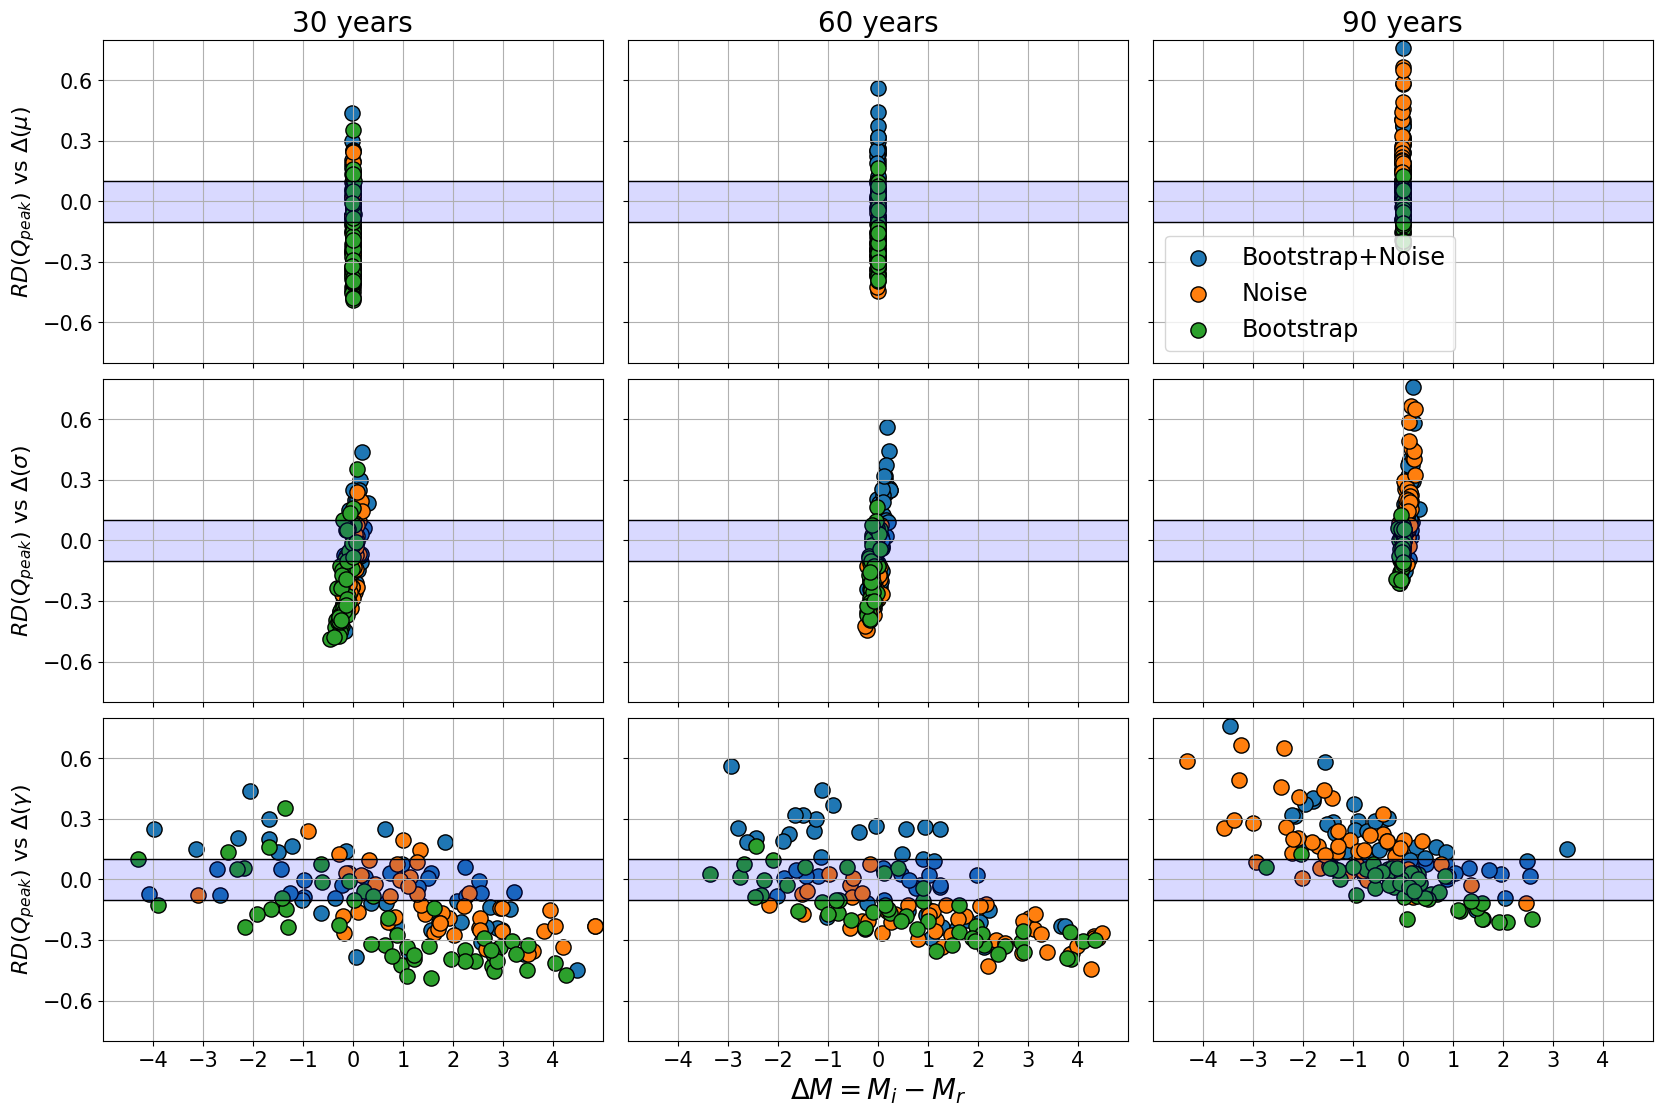

In [54]:
plot_statistics_vs_mse(stats, all_mse,wi, pos=-1, years=[30,60,90], ylim=[-0.8,0.8], xlim=[-5,5],
                       yticks=[-0.6,-0.3,0,0.3,0.6,0.9],xticks=[-4,-3,-2,-1,0,1,2,3,4],
                      error=0.1, which='wi', path = 'figures/turkey_MSE_vs_moments.png',)# figsize = (20,13))

<AxesSubplot: >

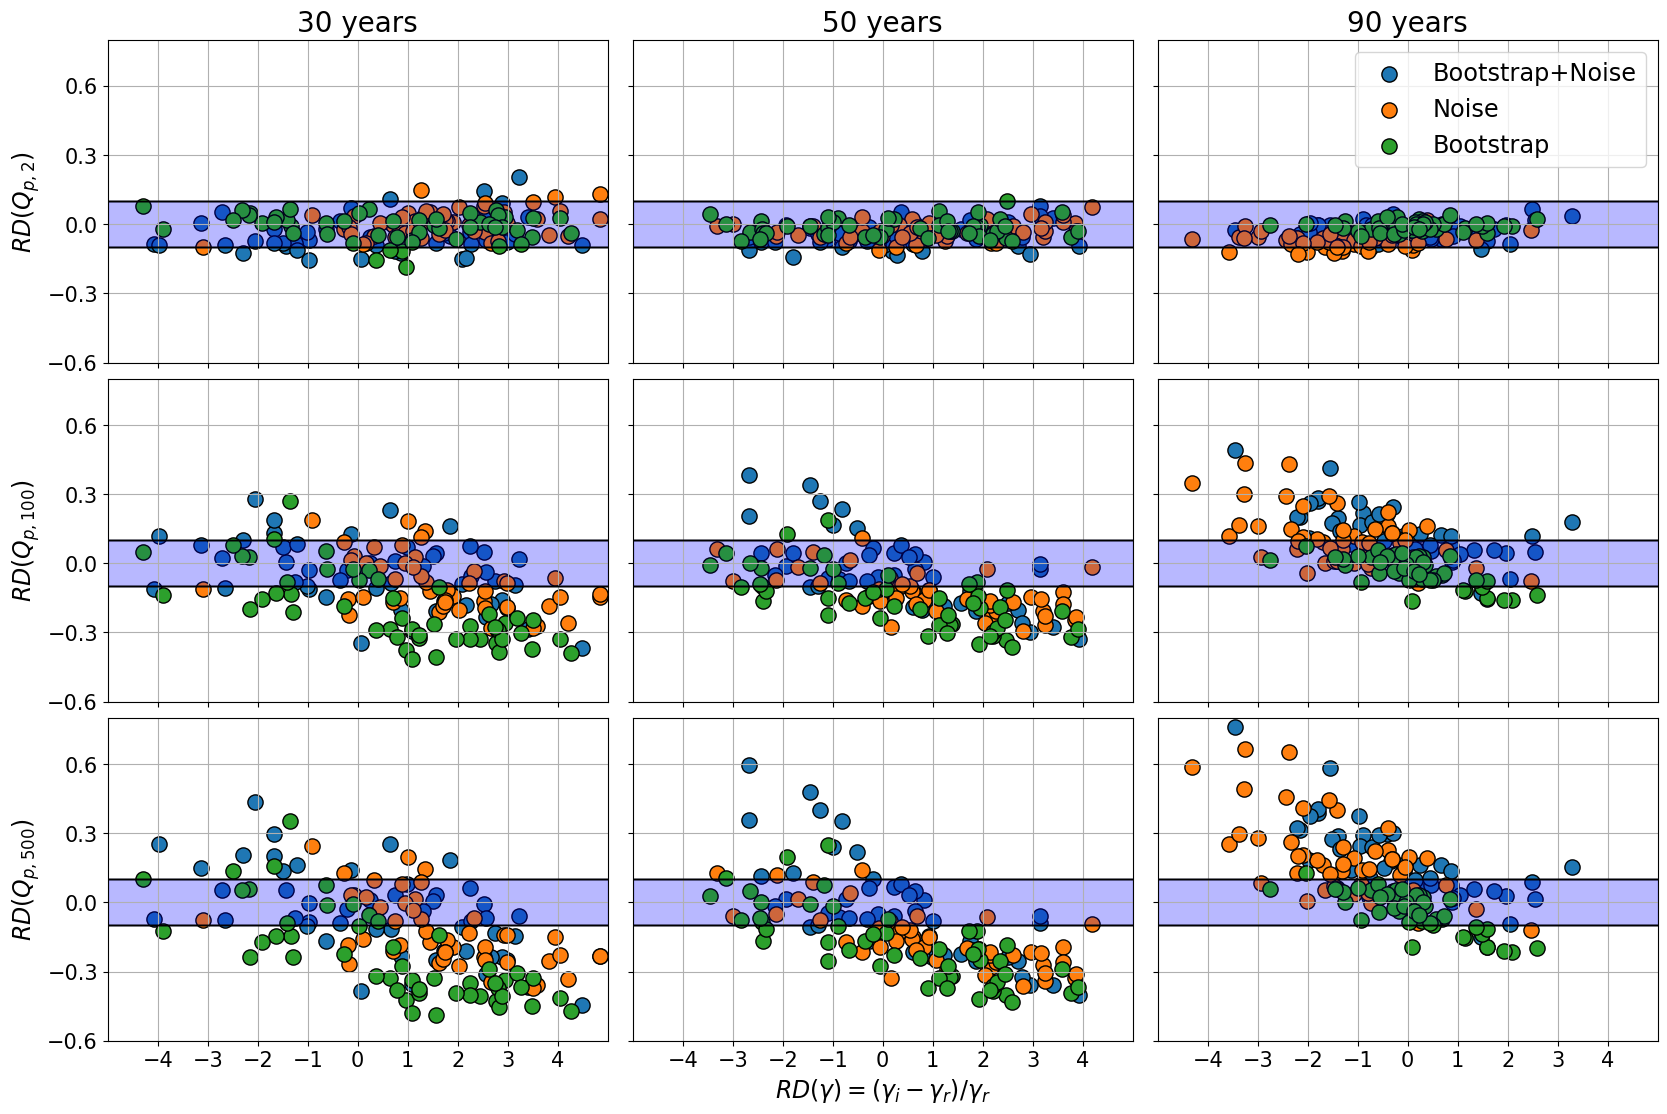

In [56]:
plot_statistics_vs_mse_compare(stats, all_mse,wi,pos=[-8,-3,-1], figsize=(20,13), 
                               yticks=[-0.6,-0.3,0,0.3,0.6],
                               ylim=[-0.6,0.8],
                               xlim = [-5,5],xticks=[-4,-3,-2,-1,0,1,2,3,4],
                              path = 'figures/turkey_MSE_vs_Tr_skew.png')

In [30]:
a = (stats[50]['NOISE']['wi'] - wi)/wi

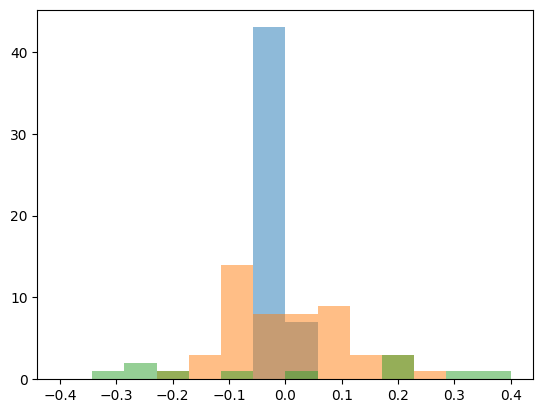

In [37]:
for i in a:
    pl.hist(i, bins = np.linspace(-0.4,0.4,15), alpha = 0.5)

# North Racoon

In [1192]:
def create_cases(path, sigma = 0.1, skew = -0.34, skeError = 0.55, 
                 realizations = 50, skewOpt = 'Weighted', years = years):
    name = path.split('-')[-1].split('.')[0]
    print(name)
    sigma = 0.1
    cases = ['noNoise','Noise','NoiseNoShuffle']
    add_noise = [False, True, True]
    shuffle = [True, True, False]
    for case, noise, shuf in zip(cases, add_noise, shuffle):
        for nyears in years:
            l = write_mutated_peaks(path,
                                '%s_%dy_%s.txt' % (name, nyears,case),
                                '%s_%dy_%s.psf' % (name, nyears,case),
                                '%s_%dy_%s.prt'  % (name, nyears,case), 
                                nyears, realizations, skew,skeError,sigma, method = 'EMS', 
                                    add_noise=noise,
                                   shuffle = shuf, skewOpt=skewOpt)

In [1193]:
create_cases('05482500f-NorthRacoon.txt', skew=-0.3919, years=[30,40,50,60,70])

NorthRacoon


In [190]:
do = read_prt('05482500F-NORTHRACOON.PRT')[0]
q,ema,p = read_obs('05482500F-NORTHRACOON.PRT')
all_ratios, all_mse, stats = ratios4cases_of_gauge('NORTHRACOON_*', do)
wo,wi = get_ema_stats('05482500F-NORTHRACOON.PRT')

<AxesSubplot:>

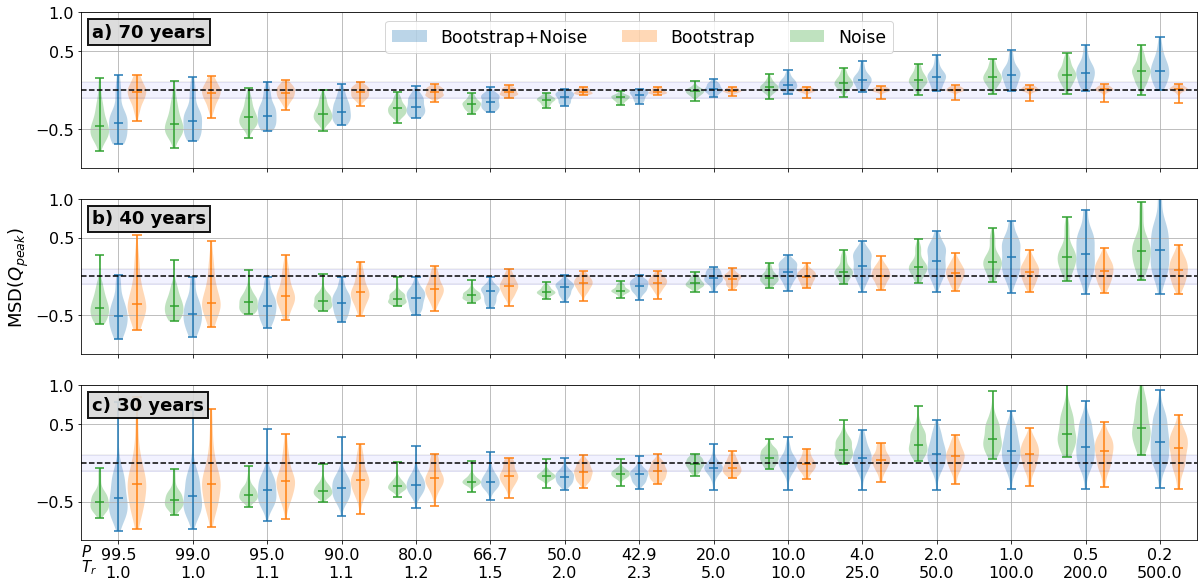

In [182]:
plot_ratios_vs_tr(all_mse, do, years=[70,40,30],ylim=[-1,1], yticks = [-0.5,1,0.5], path = 'figures/AAAnorthr_MSD.png',
                  ylabel='MSD($Q_{peak}$)')

<AxesSubplot:>

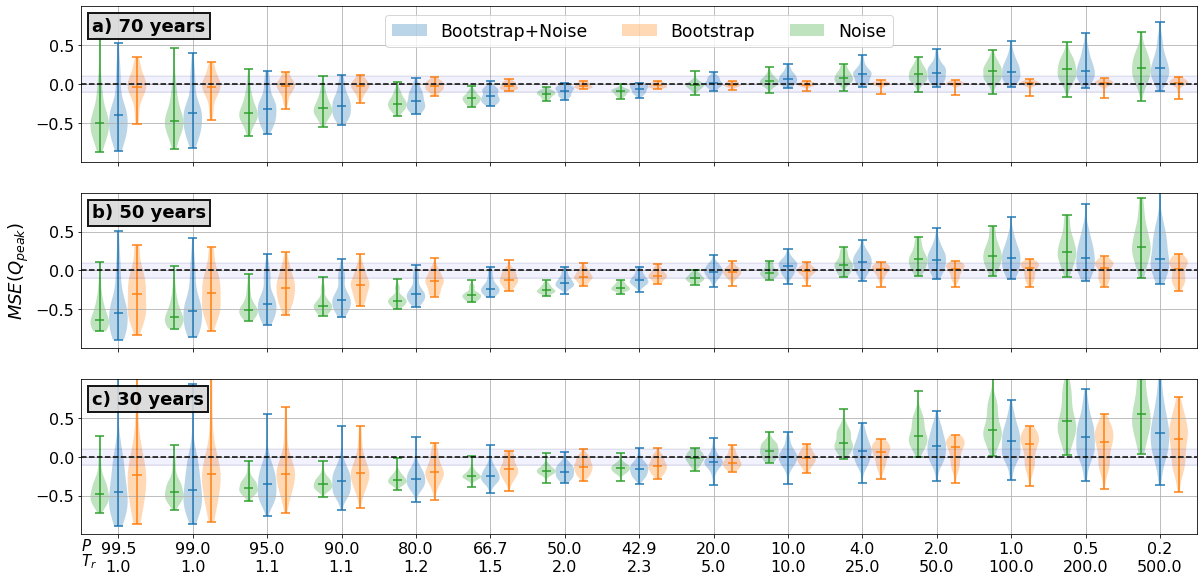

In [1202]:
plot_ratios_vs_tr(all_mse, do, years=[70,50,30],ylim=[-1,1], yticks = [-0.5,0,0.5],which='wo',
                  path='figures/northracoon_MSE_vs_Tr_wo.png')

(<Figure size 1440x864 with 9 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>)

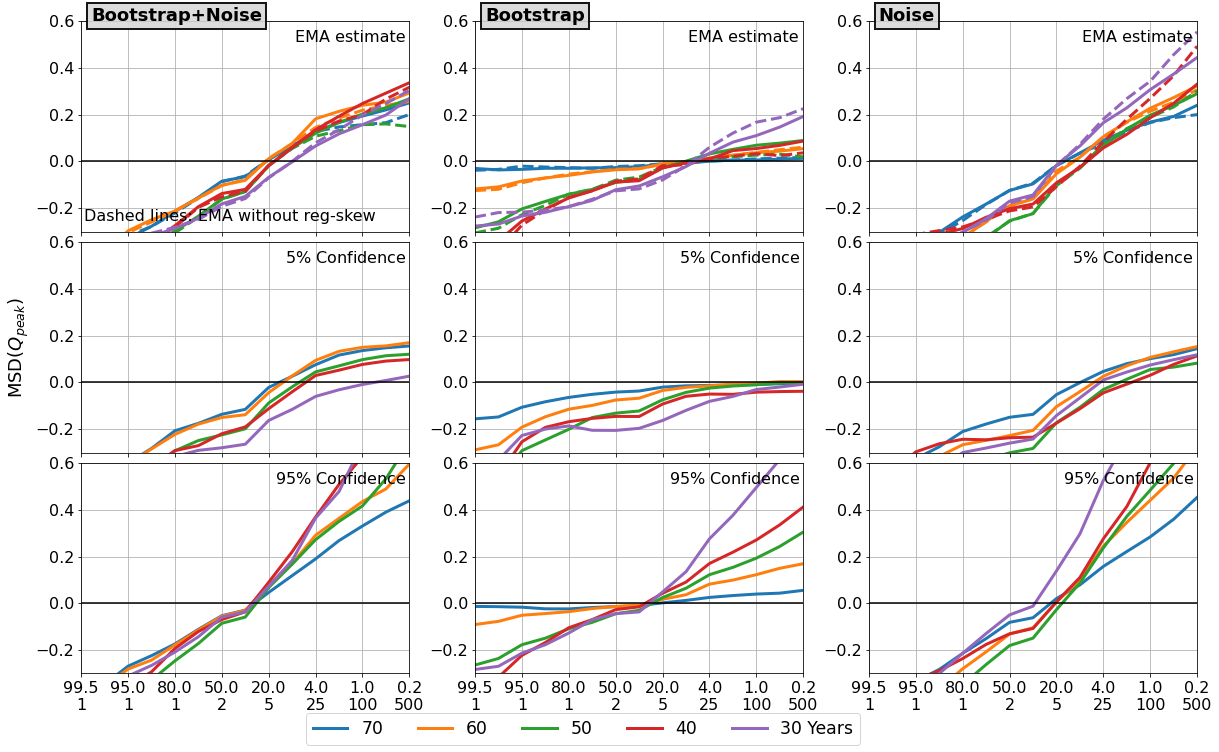

In [191]:
plot_median_ratio(all_mse, years=[70,60,50,40,30], path='figures/northracoon_median_rates.png', ylim=[-0.3,0.6], 
                  yticks=[-0.2,0,0.2,0.4,0.6])

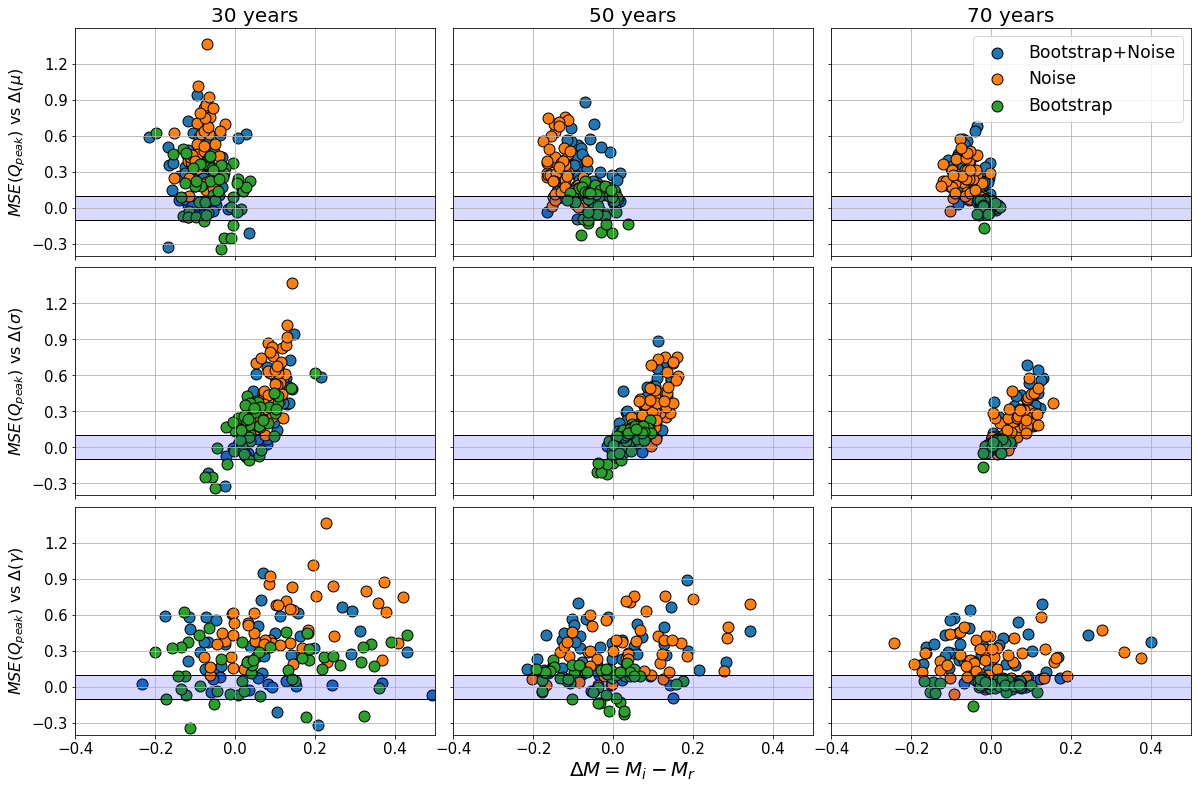

In [1212]:
plot_statistics_vs_mse(stats, all_mse, pos=-1, years=[30,50,70], ylim=[-0.4,1.5], xlim=[-0.4,0.5],
                       yticks=[-0.3,0,0.3,0.6,0.9,1.2],xticks=[-0.4,-0.2,0.0,0.2,0.4],
                      error=0.1, which='wi', path = 'figures/northracoon_MSE_vs_moments.png',)# figsize = (20,13))

<AxesSubplot:>

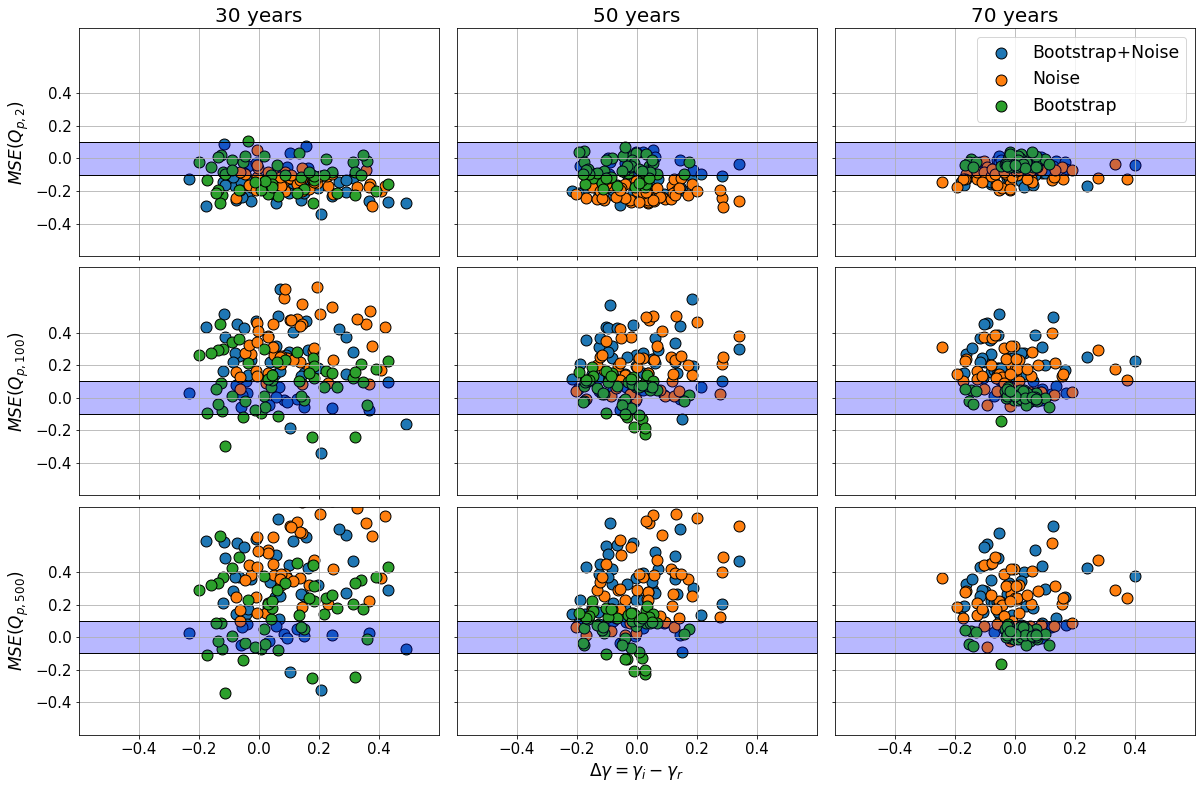

In [1214]:
plot_statistics_vs_mse_compare(stats, all_mse,pos=[-8,-3,-1], figsize=(20,13), yticks=[-0.4,-0.2,0,0.2,0.4],ylim=[-0.6,0.8],
                               xlim = [-0.6,0.6],xticks=[-0.4,-0.2,0,0.2,0.4], years = [30,50,70],
                              path = 'figures/northracoon_MSE_vs_Tr_skew.png')

# Chariton River (481)

In [53]:
fix_year_issue('peak.txt','05452000f_salt.txt')

In [54]:
create_cases('05452000f-salt.txt', skew=-0.4, years=[30,40,60])

salt


# Experimental


In [224]:
from matplotlib import cm

In [290]:
def plot_all_vs_all(base_year = 90,
    years = [30,50,90],
    gauge ='CEDAR',
    case_r='NONOISE',
    case_i = 'NONOISE',
    ybins = np.linspace(-0.6,0.6,15),
    xbins = np.linspace(-0.5,1,15),
    xticks = [-0.4,-0.2,0,0.2,0.4,0.6,0.8],
    yticks = [-0.6,-0.4,-0.2,0,0.2,0.4],
    xlabel = '$MSD(Q_{p,500y})$',
    pos_eval = -1, path = None, ylim = (0,0.6)):

    #Sample 1
    path1 = '%s_%dY_%s.PRT' % (gauge,base_year,case_r)
    dn1 = read_prt(path1)
    w1o,w1i = get_ema_stats(path1)
    fig = pl.figure(figsize=(20,12))
    gs = gridspec.GridSpec(2, 3, fig, hspace=0.05, wspace = 0.05,height_ratios = [0.3, 0.7])

    for c, year in enumerate(years):
        ax = fig.add_subplot(gs[1,c])
        ax2 = fig.add_subplot(gs[0,c])
        #Sample 2
        path2 = '%s_%dY_%s.PRT' % (gauge,year, case_i)
        dn2 = read_prt(path2)
        w2o,w2i = get_ema_stats(path2)

        sk_d = []
        mse_all = []
        for d1,w1 in zip(dn1,w1i[2]):
            for d2,w2 in zip(dn2,w2i[2]):            
                mse = (d1['w_reg_skew'] - d2['w_reg_skew']) / d2['w_reg_skew']
                if mse.sum() != 0:
                    sk_d.append(w1 - w2)
                    mse_all.append(mse.values)
        mse_all = np.array(mse_all)
        h,b = np.histogram(mse_all[:,pos_eval], bins = xbins)
        h = h.astype(float)/h.sum()



        hexe = ax.hexbin(mse_all[:,pos_eval],sk_d,mincnt=2, gridsize=20,vmax = 100,vmin=10,
                         extent=(xbins[0],xbins[-1],ybins[0],ybins[-1]), cmap=cm.Reds, edgecolors='k')    
        cbar = pl.colorbar(hexe,ax = ax, orientation='horizontal')
        cbar.ax.tick_params(labelsize = 16)
    #     if c!=1:
    #         cbar.remove()    
        ax.grid()
        ax.set_xlim(xbins[0],xbins[-1])
        ax.set_ylim(ybins[0],ybins[-1])
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
        ax.hlines(0,xbins[0],xbins[-1], color = 'k', lw = 2, ls = '--')
        ax.tick_params(labelsize = 16)
        ax.fill_betweenx(ybins,-0.1,0.1, color = 'b', alpha = 0.15)

        b = (b[1:]+b[:-1])/2
        ax2.plot(b,h, lw = 3, color = 'k')    
        ax2.grid()
        ax2.set_xlim(ax.get_xlim())
        ax2.set_xticks(ax.get_xticks())
        ax2.set_xticklabels([])
        ax2.set_ylim(*ylim)
        ax2.tick_params(labelsize = 16)
        tot_good = 100*(h[np.where(np.abs(b)<0.15)[0]].sum())
        text = 'MSD<0.1=%.1f' % tot_good
        ax2.text(0.6,0.5, text, fontdict={'size':16}, transform = ax2.transAxes,)
        ax3 = ax2.twinx()
        ax3.plot(b, np.cumsum(h), color = 'k', ls = '--', lw = 2)
        ax3.tick_params(labelsize = 16)
        ax3.set_yticks([0,0.5,1])
        ax2.fill_betweenx(ylim,-0.1,0.1, color = 'b', alpha = 0.15)
        ax2.set_title('%d years' % year, size = 18)
        if c!=2:
            ax3.set_yticklabels([])
        else:
            ax3.set_ylabel('CDF', size = 16)
        if c > 0:
            ax2.set_yticklabels([])            
            ax.set_yticklabels([])
        if c == 1:
            ax.set_xlabel(xlabel, size = 16)
        if c == 0:
            ax.set_ylabel('$\Delta \gamma = \gamma_r - \gamma_i$', size = 16)
            ax2.set_ylabel('PDF', size = 16)
    if path is not None:
        pl.savefig(path, bbox_inches = 'tight')

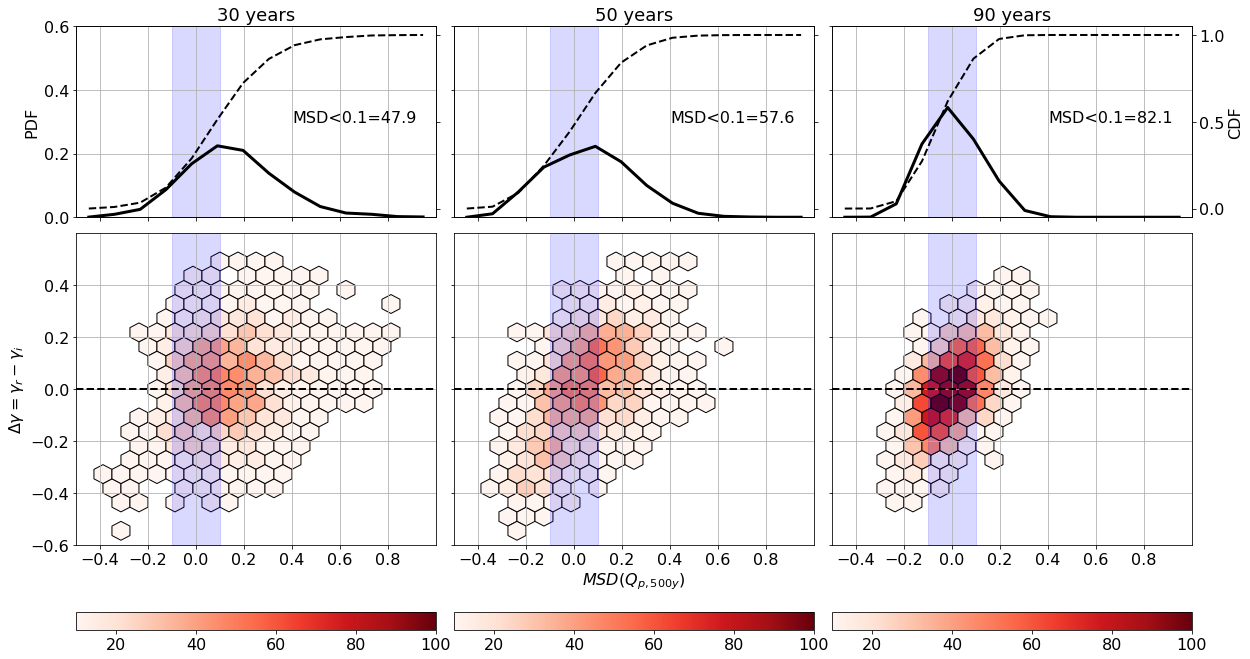

In [279]:
plot_all_vs_all(path='figures/AA_Cedar_all_vs_Qp500.png')

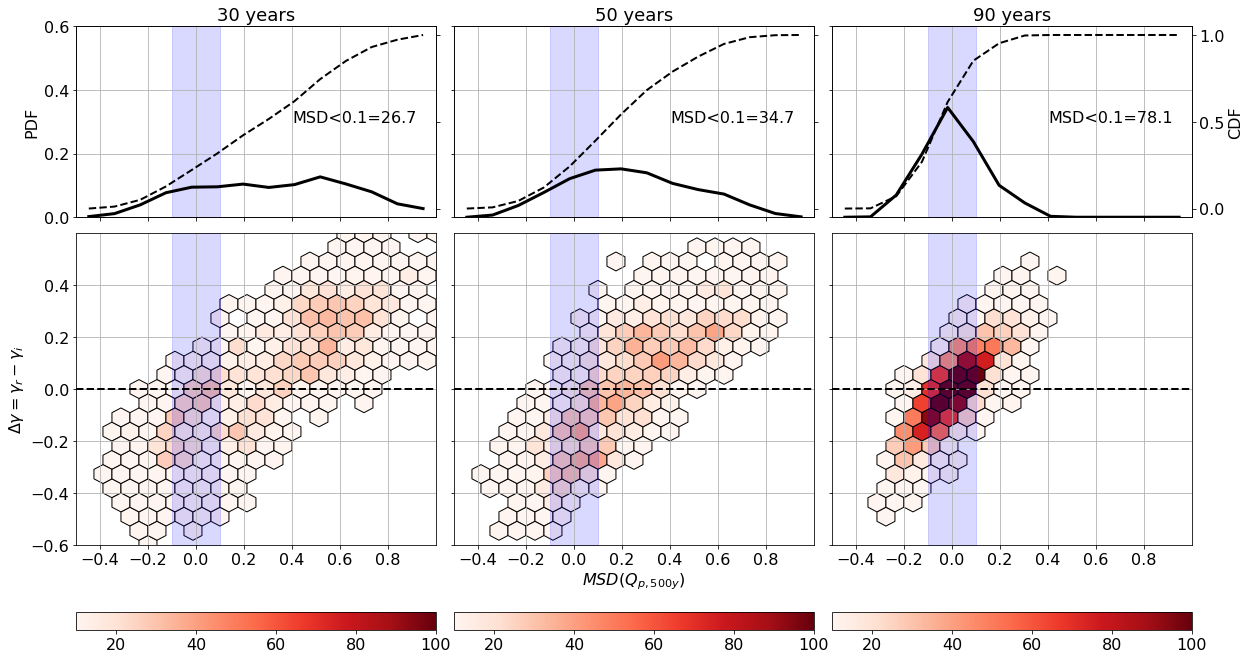

In [280]:
plot_all_vs_all(gauge='TURKEY',path='figures/AA_Turkey_all_vs_Qp500.png')

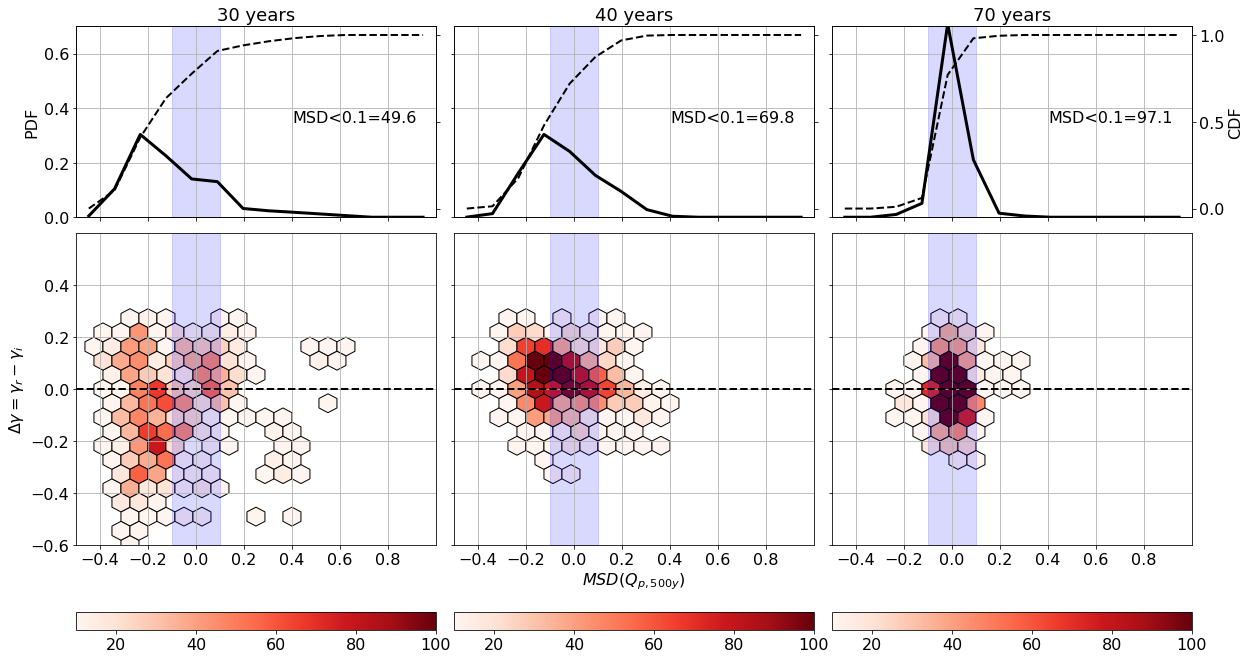

In [293]:
plot_all_vs_all(gauge='NORTHRACOON',path='figures/AA_North_all_vs_Qp500.png', years = [30,40,70], base_year = 70,
               ylim = (0,0.7))

In [362]:

def get_average_errors(base_year = 90,
    years = [30,50,60,80,90],
    gauge ='CEDAR',
    case_r='NONOISE',
    case_i = 'NONOISE',
    positions = [-7,-6,-5,-4,-3,-2,-1], good_threshold = 0.1, bad_threshold = 0.3):

    #Sample 1
    path1 = '%s_%dY_%s.PRT' % (gauge,base_year,case_r)
    dn1 = read_prt(path1)
    w1o,w1i = get_ema_stats(path1)

    good_y = []
    bad_y = []
    for c, year in enumerate(years):
        #Sample 2
        path2 = '%s_%dY_%s.PRT' % (gauge,year, case_i)
        dn2 = read_prt(path2)
        w2o,w2i = get_ema_stats(path2)

        sk_d = []
        mse_all = []
        for d1,w1 in zip(dn1,w1i[2]):
            for d2,w2 in zip(dn2,w2i[2]):            
                mse = (d1['w_reg_skew'] - d2['w_reg_skew']) / d2['w_reg_skew']
                if mse.sum() != 0:
                    sk_d.append(w1 - w2)
                    mse_all.append(mse.values)
        mse_all = np.array(mse_all)
        tot_good = []
        tot_bad = []
        for pos in positions: 
            a = mse_all[:,pos]
            tot_good.append(100*(np.where(np.abs(a)<good_threshold)[0].size / a.shape[0]))
            tot_bad.append(100*(np.where(np.abs(a)>bad_threshold)[0].size / a.shape[0]))
        good_y.append(tot_good)
        bad_y.append(tot_bad)
    return good_y, bad_y

In [426]:
gb = {}
years = [[30,50,60,80,90],[30,50,60,80,90],[30,50,60,70]]
for names,base_y,y in zip(['CEDAR','TURKEY','NORTHRACOON'],[90,90,70], years):
    good, bad = get_average_errors(base_year=base_y, gauge=names, years = y, good_threshold=0.15)
    gb.update({names:{'g':good,'b':bad}})

In [411]:
gbn = {}
years = [[30,50,60,80,90],[30,50,60,80,90],[30,50,60,70]]
for names,base_y,y in zip(['CEDAR','TURKEY','NORTHRACOON'],[90,90,70], years):
    good, bad = get_average_errors(base_year=base_y, gauge=names, years = y, good_threshold=0.15, case_i='NOISE')
    gbn.update({names:{'g':good,'b':bad}})

In [434]:
gbn2 = {}
years = [[30,50,60,80,90],[30,50,60,80,90],[30,50,60,70]]
for names,base_y,y in zip(['CEDAR','TURKEY','NORTHRACOON'],[90,90,70], years):
    good, bad = get_average_errors(base_year=base_y, gauge=names, years = y, good_threshold=0.15, case_i='NOISE', case_r='NOISE')
    gbn2.update({names:{'g':good,'b':bad}})

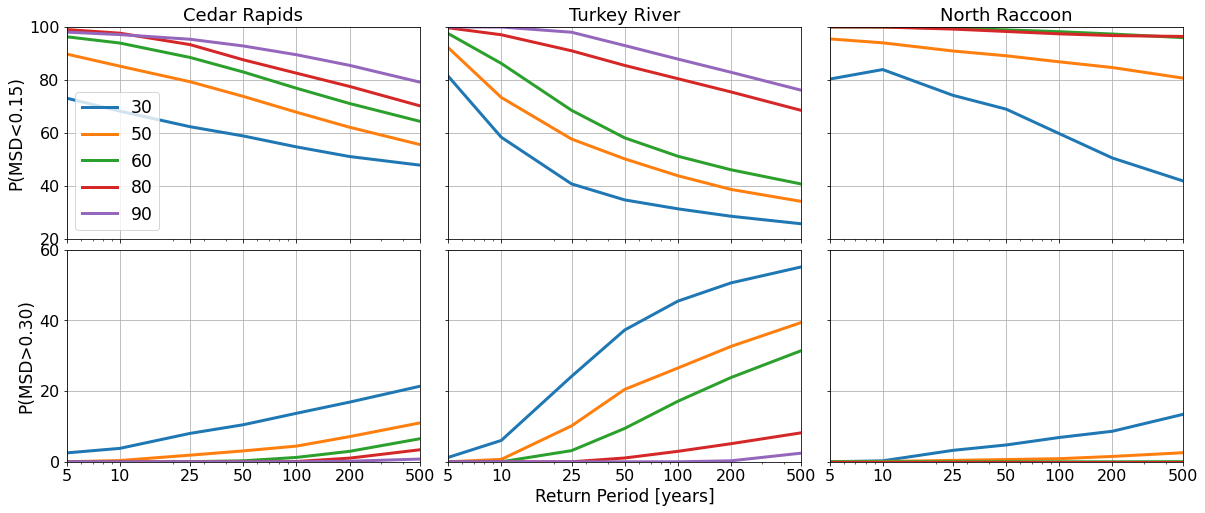

In [431]:
fig = pl.figure(figsize=(20,8))
gs = gridspec.GridSpec(2, 3, fig, hspace=0.05, wspace = 0.08)
c = 0
pname = ['Cedar Rapids','Turkey River', 'North Raccoon']
for name, year, pn in zip(gbn.keys(), years, pname):
    ax = fig.add_subplot(gs[0,c])
    ax2 = fig.add_subplot(gs[1,c])
    for val,bal,y in zip(gb[name]['g'],gb[name]['b'], year):
        ax.plot([5,10,25,50,100,200,500],val, label = y, lw = 3)
        ax2.plot([5,10,25,50,100,200,500],bal, label = y, lw = 3)
    ax.set_ylim(20,100)
    ax2.set_ylim(0,60)
    if c>0:
        ax.set_yticklabels([])
        ax2.set_yticklabels([])
    if c == 0:
        ax.legend(loc = 0, fontsize = 'xx-large')
        ax.set_ylabel('P(MSD<0.15)', size = 17)
        ax2.set_ylabel('P(MSD>0.30)', size = 17)
    if c == 1:
        ax2.set_xlabel('Return Period [years]', size = 17)
    ax.grid()
    ax2.grid()
    ax.tick_params(labelsize = 16)
    ax2.tick_params(labelsize = 16)
    ax.set_xscale('log')
    ax2.set_xscale('log')
    xt = ax.set_yticks([20,40,60,80,100])    
    xt = ax2.set_yticks([0,20,40,60])    
    ax.set_title(pn, size = 18)
    xt = ax.set_xticks([5,10,25,50,100,200,500])
    xt = ax2.set_xticks([5,10,25,50,100,200,500])
    ax.set_xlim(5,500)
    ax2.set_xlim(5,500)
    ax.set_xticklabels([])
    ax2.set_xticklabels([5,10,25,50,100,200,500])
    c+=1
pl.savefig('figures/Prob_MSD_nonoise.png', bbox_inches = 'tight')

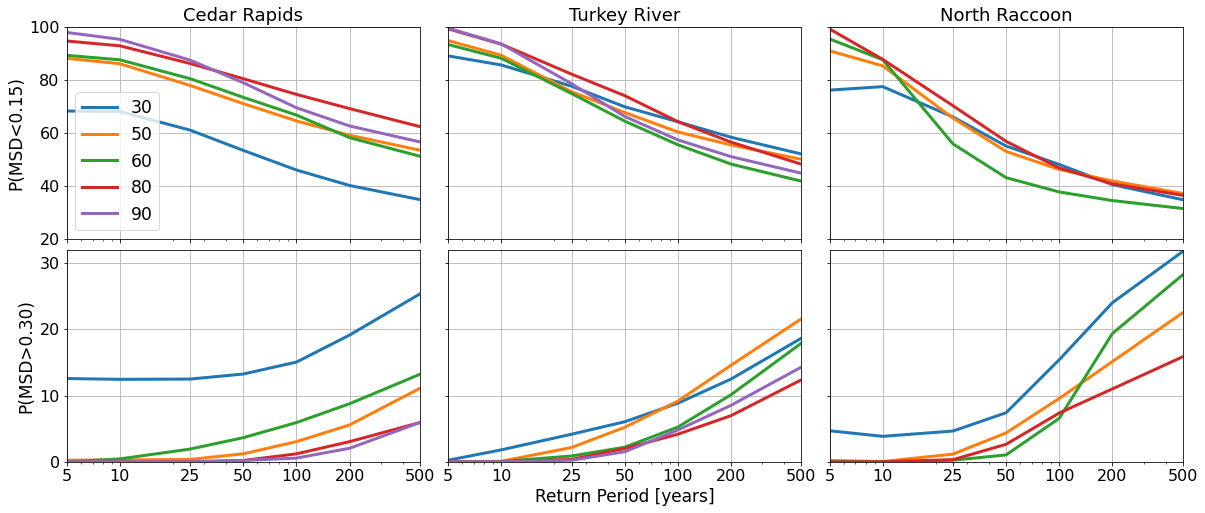

In [432]:
fig = pl.figure(figsize=(20,8))
gs = gridspec.GridSpec(2, 3, fig, hspace=0.05, wspace = 0.08)
c = 0
pname = ['Cedar Rapids','Turkey River', 'North Raccoon']
for name, year, pn in zip(gbn.keys(), years, pname):
    ax = fig.add_subplot(gs[0,c])
    ax2 = fig.add_subplot(gs[1,c])
    for val,bal,y in zip(gbn[name]['g'],gbn[name]['b'], year):
        ax.plot([5,10,25,50,100,200,500],val, label = y, lw = 3)
        ax2.plot([5,10,25,50,100,200,500],bal, label = y, lw = 3)
    ax.set_ylim(20,100)
    ax2.set_ylim(0,32)
    if c>0:
        ax.set_yticklabels([])
        ax2.set_yticklabels([])
    if c == 0:
        ax.legend(loc = 0, fontsize = 'xx-large')
        ax.set_ylabel('P(MSD<0.15)', size = 17)
        ax2.set_ylabel('P(MSD>0.30)', size = 17)
    if c == 1:
        ax2.set_xlabel('Return Period [years]', size = 17)
    ax.grid()
    ax2.grid()
    ax.tick_params(labelsize = 16)
    ax2.tick_params(labelsize = 16)
    ax.set_xscale('log')
    ax2.set_xscale('log')
    xt = ax.set_yticks([20,40,60,80,100])    
    xt = ax2.set_yticks([0,10,20,30])    
    ax.set_title(pn, size = 18)
    xt = ax.set_xticks([5,10,25,50,100,200,500])
    xt = ax2.set_xticks([5,10,25,50,100,200,500])
    ax.set_xlim(5,500)
    ax2.set_xlim(5,500)
    ax.set_xticklabels([])
    ax2.set_xticklabels([5,10,25,50,100,200,500])
    c+=1
pl.savefig('figures/Prob_MSD_noise.png', bbox_inches = 'tight')

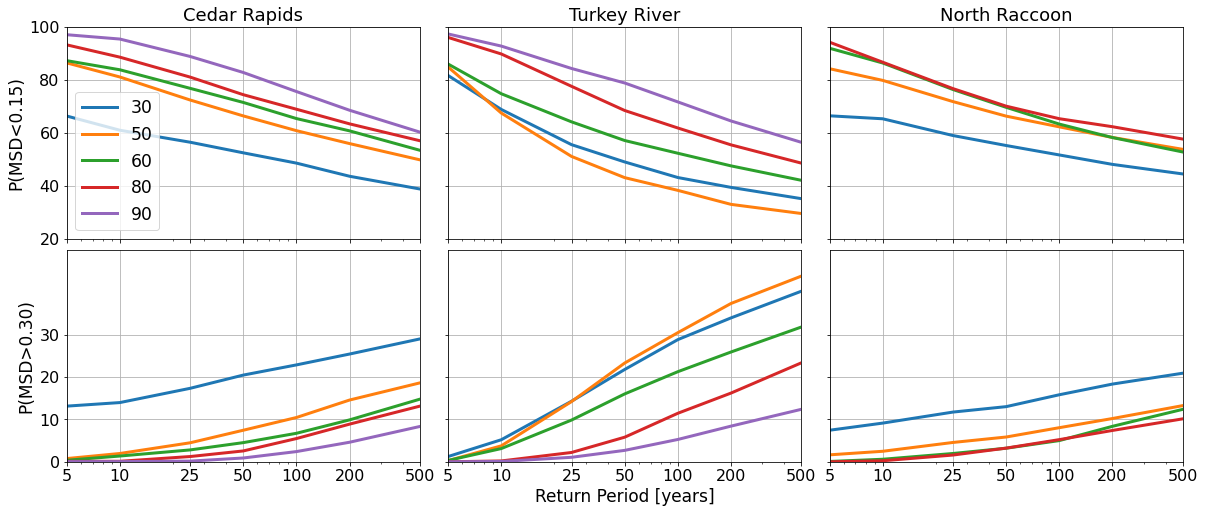

In [437]:
fig = pl.figure(figsize=(20,8))
gs = gridspec.GridSpec(2, 3, fig, hspace=0.05, wspace = 0.08)
c = 0
pname = ['Cedar Rapids','Turkey River', 'North Raccoon']
for name, year, pn in zip(gbn.keys(), years, pname):
    ax = fig.add_subplot(gs[0,c])
    ax2 = fig.add_subplot(gs[1,c])
    for val,bal,y in zip(gbn2[name]['g'],gbn2[name]['b'], year):
        ax.plot([5,10,25,50,100,200,500],val, label = y, lw = 3)
        ax2.plot([5,10,25,50,100,200,500],bal, label = y, lw = 3)
    ax.set_ylim(20,100)
    ax2.set_ylim(0,50)
    if c>0:
        ax.set_yticklabels([])
        ax2.set_yticklabels([])
    if c == 0:
        ax.legend(loc = 0, fontsize = 'xx-large')
        ax.set_ylabel('P(MSD<0.15)', size = 17)
        ax2.set_ylabel('P(MSD>0.30)', size = 17)
    if c == 1:
        ax2.set_xlabel('Return Period [years]', size = 17)
    ax.grid()
    ax2.grid()
    ax.tick_params(labelsize = 16)
    ax2.tick_params(labelsize = 16)
    ax.set_xscale('log')
    ax2.set_xscale('log')
    xt = ax.set_yticks([20,40,60,80,100])    
    xt = ax2.set_yticks([0,10,20,30])    
    ax.set_title(pn, size = 18)
    xt = ax.set_xticks([5,10,25,50,100,200,500])
    xt = ax2.set_xticks([5,10,25,50,100,200,500])
    ax.set_xlim(5,500)
    ax2.set_xlim(5,500)
    ax.set_xticklabels([])
    ax2.set_xticklabels([5,10,25,50,100,200,500])
    c+=1
pl.savefig('figures/Prob_MSD_noise_noise.png', bbox_inches = 'tight')

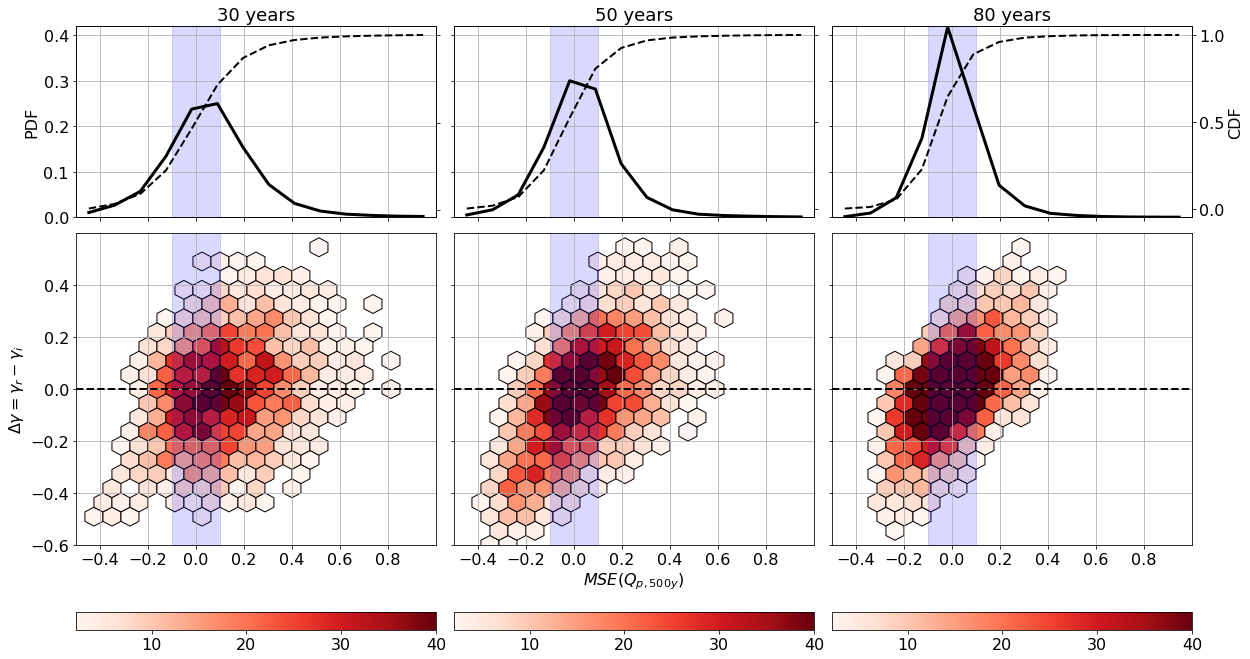

In [1479]:
base_year = 80
years = [30,50,80]
case = 'NONOISE'
ybins = np.linspace(-0.6,0.6,15)
xbins = np.linspace(-0.5,1,15)
xticks = [-0.4,-0.2,0,0.2,0.4,0.6,0.8]
yticks = [-0.6,-0.4,-0.2,0,0.2,0.4]
#Sample 1
path1 = 'CEDAR_%dY_%s.PRT' % (base_year,case)
dn1 = read_prt(path1)
w1o,w1i = get_ema_stats(path1)
fig = pl.figure(figsize=(20,12))
gs = gridspec.GridSpec(2, 3, fig, hspace=0.05, wspace = 0.05,height_ratios = [0.3, 0.7])

for c, year in enumerate(years):
    ax = fig.add_subplot(gs[1,c])
    ax2 = fig.add_subplot(gs[0,c])
    #Sample 2
    path2 = 'CEDAR_%dY_%s.PRT' % (year, case)
    dn2 = read_prt(path2)
    w2o,w2i = get_ema_stats(path2)

    sk_d = []
    mse_all = []
    for d1,w1 in zip(dn1,w1i[2]):
        for d2,w2 in zip(dn2,w2i[2]):            
            mse = (d1['w_reg_skew'] - d2['w_reg_skew']) / d2['w_reg_skew']
            if mse.sum() != 0:
                sk_d.append(w1 - w2)
                mse_all.append(mse.values)
    mse_all = np.array(mse_all)
    h,b = np.histogram(mse_all, bins = xbins)
    h = h.astype(float)/h.sum()
    
    
    
    hexe = ax.hexbin(mse_all[:,-1],sk_d,mincnt=2, gridsize=20,vmax=40, 
                     extent=(xbins[0],xbins[-1],ybins[0],ybins[-1]), cmap=cm.Reds, edgecolors='k')    
    cbar = pl.colorbar(hexe,ax = ax, orientation='horizontal')
    cbar.ax.tick_params(labelsize = 16)
#     if c!=1:
#         cbar.remove()    
    ax.grid()
    ax.set_xlim(xbins[0],xbins[-1])
    ax.set_ylim(ybins[0],ybins[-1])
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.hlines(0,xbins[0],xbins[-1], color = 'k', lw = 2, ls = '--')
    ax.tick_params(labelsize = 16)
    ax.fill_betweenx(ybins,-0.1,0.1, color = 'b', alpha = 0.15)
    
    b = (b[1:]+b[:-1])/2
    ax2.plot(b,h, lw = 3, color = 'k')    
    ax2.grid()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(ax.get_xticks())
    ax2.set_xticklabels([])
    ax2.set_ylim(0,0.42)
    ax2.tick_params(labelsize = 16)
    ax3 = ax2.twinx()
    ax3.plot(b, np.cumsum(h), color = 'k', ls = '--', lw = 2)
    ax3.tick_params(labelsize = 16)
    ax3.set_yticks([0,0.5,1])
    ax2.fill_betweenx(ybins,-0.1,0.1, color = 'b', alpha = 0.15)
    ax2.set_title('%d years' % year, size = 18)
    if c!=2:
        ax3.set_yticklabels([])
    else:
        ax3.set_ylabel('CDF', size = 16)
    if c > 0:
        ax2.set_yticklabels([])            
        ax.set_yticklabels([])
    if c == 1:
        ax.set_xlabel('$MSE(Q_{p,500y})$', size = 16)
    if c == 0:
        ax.set_ylabel('$\Delta \gamma = \gamma_r - \gamma_i$', size = 16)
        ax2.set_ylabel('PDF', size = 16)

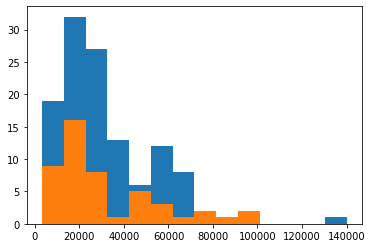

In [200]:
bins = np.linspace(q.min(),q.max(),15)
h,b,ax = pl.hist(q, bins = bins)
hs,bs,ax = pl.hist(qs[4], bins = bins)

In [186]:
def get_entropy(q, nbins = 10):
    bins = np.linspace(q.min(),q.max(),nbins)
    h, b = np.histogram(q, bins = bins)
    return entropy(h)

In [281]:
all_ratios[80].keys()

dict_keys(['NOISE', 'NOISENOSHUFFLE', 'NONOISE'])

2254


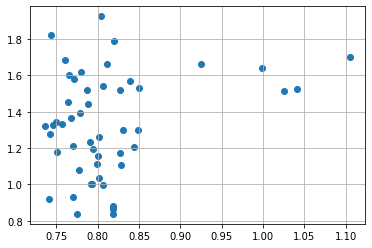

In [307]:
qs = read_synthetic_peaks('cedar_40y_noNoise.txt')
nbins = 12
entr = np.array([get_entropy(i,nbins=nbins) for i in qs])
entr_r = get_entropy(q, nbins = nbins) / entr
skew = np.array([stats.skew(i) for i in qs])
mean = np.array([np.mean(i) for i in qs])
desv = np.array([np.std(i) for i in qs])
pl.scatter(entr_r, all_ratios[40]['NONOISE'].T[-1])
pl.grid()

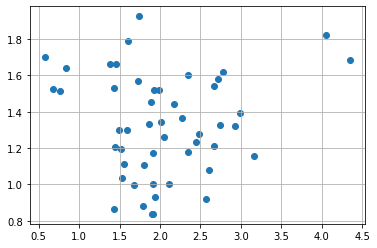

In [309]:

skew_r = stats.skew(q)/skew
mean_r = np.mean(q)/mean
desv_r = np.std(q)/desv
# pl.scatter(mean_r, all_ratios[40]['NONOISE'].T[-1])
#pl.scatter(desv_r, all_ratios[40]['NONOISE'].T[-1])
pl.scatter(skew_r, all_ratios[40]['NONOISE'].T[-1])
pl.grid( )

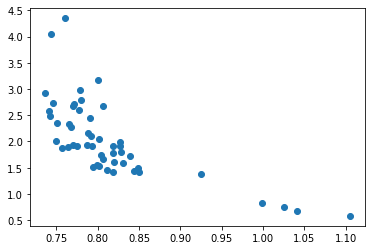

In [310]:
pl.scatter(entr_r, skew_r)

In [251]:
x = np.random.normal(0,1,100)
hx = np.histogram(x,bins = np.linspace(0,1,15))[0]
y = 0.0*x + 0.8*np.random.uniform(0,1,100)
hy = np.histogram(y,bins = np.linspace(0,1,15))[0]
met.mutual_info_score(hx,hy, )

0.9245483475847156

In [252]:
met.adjusted_mutual_info_score(hx, hy)

0.1812624446615379

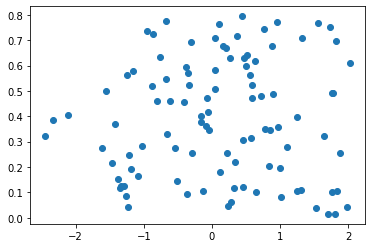

In [253]:
pl.scatter(x, y)

In [248]:
def calc_MI(X,Y,bins):
    #X = np.random.choice(X, Y.size, False)
    c_XY = np.histogram2d(X,Y,bins)[0]
    c_X = np.histogram(X,bins)[0]
    c_Y = np.histogram(Y,bins)[0]

    H_X = shan_entropy(c_X)
    H_Y = shan_entropy(c_Y)
    H_XY = shan_entropy(c_XY)

    MI = H_X + H_Y - H_XY
    return MI

def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

In [313]:
stats.skew(np.log(qs[0]))

-0.5574579716771597

In [318]:
stats.skew(np.log(q))

-0.4104415316192855

In [225]:
np.histogram2d(np.random.choice(q, qs[0].size, False), qs[0])

(array([[6., 7., 3., 1., 1., 1., 1., 0., 0., 0.],
        [7., 5., 3., 1., 0., 0., 0., 0., 0., 0.],
        [2., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
        [2., 0., 2., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([  8620.,  21758.,  34896.,  48034.,  61172.,  74310.,  87448.,
        100586., 113724., 126862., 140000.]),
 array([  2764. ,  16487.6,  30211.2,  43934.8,  57658.4,  71382. ,
         85105.6,  98829.2, 112552.8, 126276.4, 140000. ]))